In [ ]:
#Imports
import itertools
import json
from collections import Counter
import pandas as pd
import numpy as np
import os
from sklearn import metrics
from pprint import pprint

In [2]:
#Constants
BASE_HPFV_FOLDER = "TestResults/FullResultOnlyHPFVNew/"
BASE_TEXT_FOLDER = "TestResults/FullResultOnlyTextNew/"
BASE_HPFV_START = "OnlyHpfv_List_"
BASE_TEXT_START = "OnlyText_List_"
BASE_MID = "_SnipLen_"
BASE_END = "_Results.jsonl"
SNIPPET_LENS = [5,10,25,50,75,100]
BASE_COVOC_FOLDER = "TestResults/COVOC_FullResult/"
#BASE_COVOC_FOLDER = "TestResults/COVOC_FullResult_No_bookid_data/"
BASE_COVOC_START = "Sniplen_"
BASE_COVOC_MID = "_Keylist_"
BASE_COVOC_HPFV_END = "_hpfv.json"
BASE_COVOC_TEXT_END = "_tfidf.json"

keylists = []
with open("Keylists.jsonl", 'r') as f:
    for line in f:
        keylists.append(json.loads(line))

In [3]:
def helperParser(file):
    temp = []
    with open(file, 'r') as f:
        for line in f:
            it = json.loads(line)
            it['sniplen'] = file[file.find(BASE_MID)+9:file.find(BASE_END)]
            temp.append(it)
    return temp

def helperParser2(file):
    with open(file, 'r') as f:
        return json.loads(f.read())

In [4]:
loaded_hpfv = []
for i in range(100):
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'5'+BASE_END))
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'10'+BASE_END))
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'25'+BASE_END))
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'50'+BASE_END))
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'75'+BASE_END))
    loaded_hpfv.append(helperParser(BASE_HPFV_FOLDER+BASE_HPFV_START+str(i)+BASE_MID+'100'+BASE_END))

In [5]:
loaded_text = []
for i in range(100):
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'5'+BASE_END))
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'10'+BASE_END))
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'25'+BASE_END))
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'50'+BASE_END))
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'75'+BASE_END))
    loaded_text.append(helperParser(BASE_TEXT_FOLDER+BASE_TEXT_START+str(i)+BASE_MID+'100'+BASE_END))

In [6]:
loaded_covoc_hpfv = []
loaded_covoc_text = []
for f in os.listdir(BASE_COVOC_FOLDER):
    if f[-10:] == BASE_COVOC_HPFV_END and len(f) < 33:
        loaded_covoc_hpfv.append(helperParser2(BASE_COVOC_FOLDER+f))
    elif f[-10:] =='tfidf.json':
        loaded_covoc_text.append(helperParser2(BASE_COVOC_FOLDER+f))

In [7]:
print(Counter([x['sniplen'] for x in loaded_covoc_hpfv]))

Counter({25: 100, 5: 100, 50: 100, 75: 100, 100: 100, 10: 100})


In [8]:
def helperParser2(temp_list: list[dict], key: str):
    return [x[key] for x in temp_list]

def flattenList(temp_list):
    return [x for y in temp_list for x in y]

In [9]:
#Load up OVR hpfv results
df_ovr_hpfv = pd.DataFrame.from_dict(flattenList(loaded_hpfv))
df_ovr_hpfv['sniplen'] = df_ovr_hpfv['sniplen'].apply(lambda x: int(x))
#Load up OVR tfidf results
df_ovr_text = pd.DataFrame.from_dict(flattenList(loaded_text))
df_ovr_text['sniplen'] = df_ovr_text['sniplen'].apply(lambda x: int(x))
#Load up OVO tfidf results
df_ovo_text = pd.DataFrame.from_dict(loaded_covoc_text).sort_values('keylist_id')
df_ovo_text['sniplen'] = df_ovo_text['sniplen'].apply(lambda x: int(x))
#Load up OVO tfidf results
df_ovo_hpfv = pd.DataFrame.from_dict(loaded_covoc_hpfv).sort_values('keylist_id')
df_ovo_hpfv['sniplen'] = df_ovo_hpfv['sniplen'].apply(lambda x: int(x))

In [10]:
param_df_ovr_hpfv = df_ovr_hpfv[['keylist_id','sniplen','f1']]
param_df_ovr_text = df_ovr_text[['keylist_id','sniplen','f1']]
param_df_ovo_hpfv = df_ovo_hpfv[['keylist_id','sniplen','f1']]
param_df_ovo_text = df_ovo_text[['keylist_id','sniplen','f1']]

In [11]:
#Seeing results for splits we also trained a FinBERT on
bert_split = 39
print(param_df_ovr_text[param_df_ovr_text['keylist_id'] == bert_split])

     keylist_id  sniplen        f1
234          39        5  0.366116
235          39       10  0.378553
236          39       25  0.396474
237          39       50  0.404179
238          39       75  0.412610
239          39      100  0.398803


In [12]:
print(param_df_ovo_text[param_df_ovo_text['keylist_id'] == bert_split])

     keylist_id  sniplen        f1
104          39      100  0.412605
38           39       75  0.413448
66           39       50  0.412252
350          39       25  0.399372
379          39        5  0.370351
434          39       10  0.381890


In [13]:
print(param_df_ovr_hpfv[param_df_ovr_hpfv['keylist_id'] == bert_split])

     keylist_id  sniplen        f1
234          39        5  0.353659
235          39       10  0.372105
236          39       25  0.401620
237          39       50  0.428754
238          39       75  0.450331
239          39      100  0.463243


In [14]:
print(param_df_ovo_hpfv[param_df_ovo_hpfv['keylist_id'] == bert_split])

     keylist_id  sniplen        f1
169          39       10  0.378807
564          39       25  0.413304
24           39      100  0.442949
196          39       75  0.455983
95           39        5  0.357380
39           39       50  0.431445


## Differences between ovr and ovo

In [15]:
def getMeanDiff(sniplen, df1, df2):
    return np.mean(df1[df1['sniplen'] == sniplen]['f1'].to_numpy()-df2[df2['sniplen'] == sniplen]['f1'].to_numpy())

In [16]:
print(getMeanDiff(5, param_df_ovo_text, param_df_ovr_text))

0.002836979985197498


## Param_df plots

In [17]:
#Imports
import matplotlib.pyplot as plt
import seaborn as sns

## Plot accuracy and keylist_id (with different c's)

In [18]:
def getLineplotKeylists(sniplen, df):
    start = 0
    increment = 0.05
    snip_df = df[(df['sniplen'] == sniplen)].sort_values('f1')
    snip_df['keylist_id'] = snip_df['keylist_id'].apply(lambda x: str(x))
    ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', sort=False)
    #ax.set_xticks(snip_df['keylist_id'].to_numpy())
    #ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000)
    #ax.set_ylim(0, 0.7)
    #if sniplen == 5:
    #    start = ax.lines[-1].get_ydata()[-1]-increment
    #ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7))
    start += increment
    lbls = []
    for l in SNIPPET_LENS:
        lbls.append(str(l))
        lbls.append(str(l)+"_99%_ci")

In [19]:
#getLineplotKeylists(100, param_df_ovr_text)

In [20]:
fbt_data = []
for i in range(21):
    addable = {}
    with open("TestResults/FinBERT_split_"+str(i)+".json", 'r') as f:
        addable['keylist_id'] = i
        addable['f1'] = json.loads(f.read())['eval_accuracy']
    fbt_data.append(addable)
for i in range(21, 100):
    addable = {}
    addable['keylist_id'] = i
    addable['f1'] = np.nan
    fbt_data.append(addable)

In [21]:
#Same as above but ordered by f1 from worst to best
def getLineplotKeylistsSorted(df, sniplen=None):
    plt.figure(figsize=(15,8))
    start = 0
    increment = 0.05
    order = []
    if sniplen:
        snip_df = df[(df['sniplen'] == sniplen)]
        if len(order) == 0:
            order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()
        ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000, sort=False)
        ax.set_ylim(0, 0.7)
        if sniplen == 5:
            start = ax.lines[-1].get_ydata()[-1]-increment
        ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7))
        ax.set_ylabel("Macro f1")
        ax.set_xlabel("Split id")
        start += increment
    else:
        for sniplen in SNIPPET_LENS:
            snip_df = df[(df['sniplen'] == sniplen)]
            if len(order) == 0:
                order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()
            ax = sns.lineplot(data=snip_df, x='keylist_id', y='f1', estimator='mean', errorbar=('ci', 99), n_boot=1000, sort=False)
            ax.set_ylim(0.25, 0.7)
            if sniplen == 5:
                start = ax.lines[-1].get_ydata()[-1]-increment*2
            ax.text(107, start+increment, sniplen, bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=0.7), fontsize=16)
            ax.set_ylabel("Macro f1", fontsize=16)
            ax.set_xlabel("Split id", fontsize=16)
            ax.tick_params(axis='both', which='major', labelsize=16)
            start += increment
        #Add FinBERT for the first 20 splits
        fbt_df = pd.DataFrame.from_dict(fbt_data)
        ax = sns.lineplot(data=fbt_df, x='keylist_id', y='f1', estimator=None, sort=False, linewidth=5)
        ax.set_ylim(0.25, 0.7)
        ax.text(107, start+increment, 'FinBERT', bbox=dict(facecolor=ax.lines[-1].get_color(), alpha=1), fontsize=16)
        ax.set_ylabel("Macro f1", fontsize=16)
        ax.set_xlabel("Split id", fontsize=16)
        ax.tick_params(axis='both', which='major', labelsize=16)
        lbls = []
        for l in SNIPPET_LENS:
            lbls.append(str(l))
            lbls.append(str(l)+"_99%_ci")

/tmp/ipykernel_48267/898765180.py:23: FutureWarning: The provided callable <function mean at 0x7545f00c9240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()


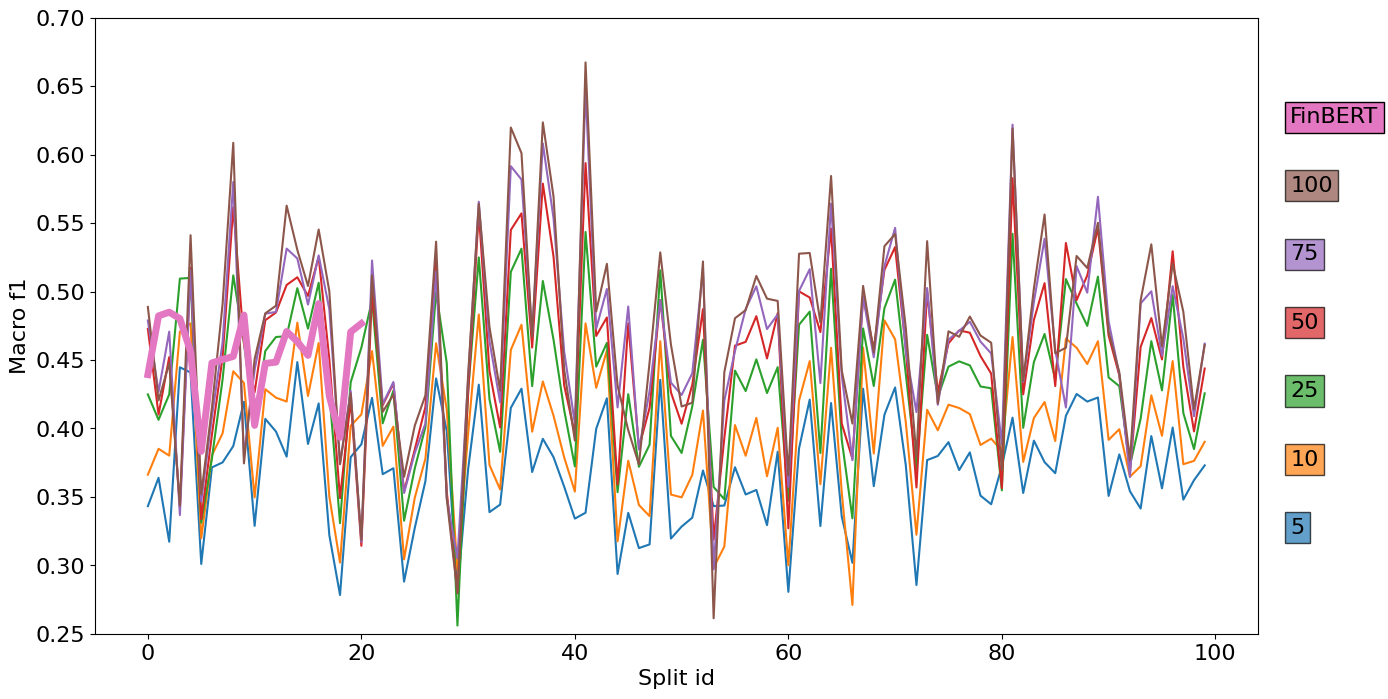

In [22]:
getLineplotKeylistsSorted(param_df_ovo_hpfv)

/tmp/ipykernel_48267/898765180.py:23: FutureWarning: The provided callable <function mean at 0x7545f00c9240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  order = snip_df.groupby('keylist_id')[['keylist_id', 'f1']].agg(np.mean).to_numpy()


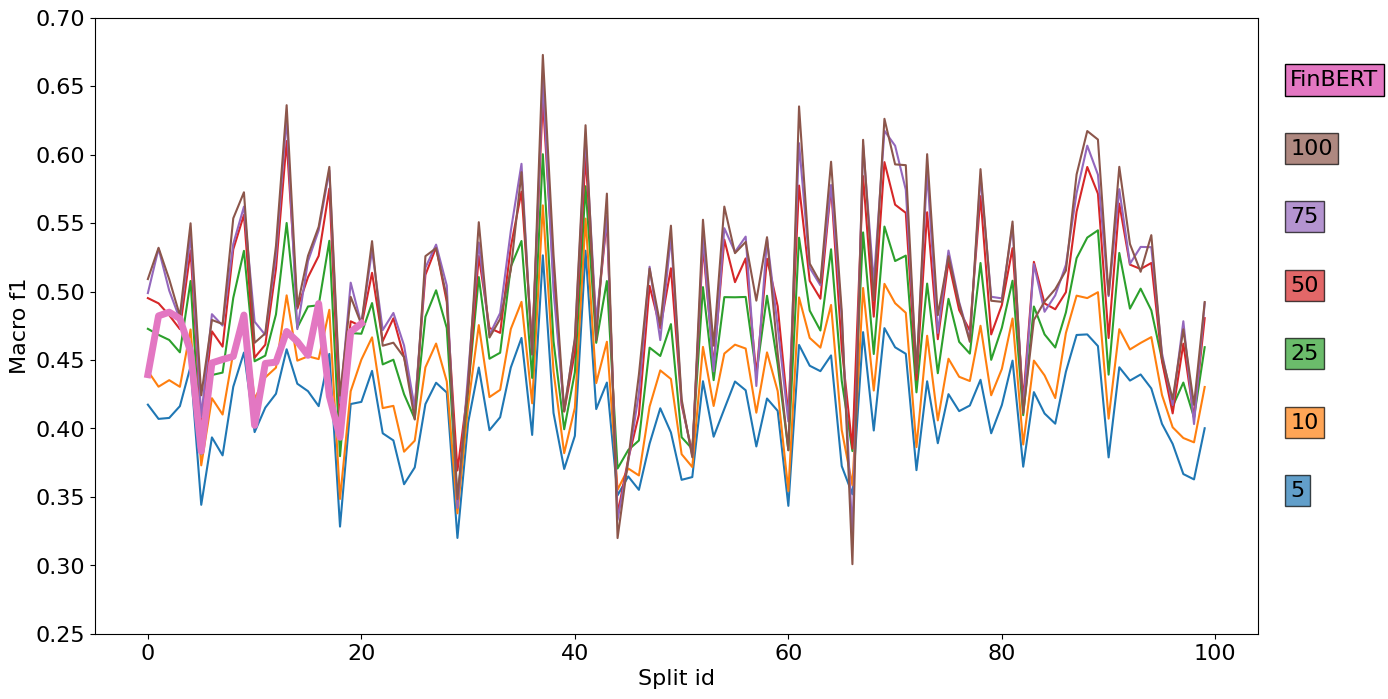

In [23]:
getLineplotKeylistsSorted(param_df_ovo_text)

## Checking if there is a patter in some books being a part of the worst splits...

In [24]:
#Testing with book_ids and train
from scripts import bookdatafunctions as bdf

def assignLabel(ex):
    age = int(bdf.findAgeFromID(ex))
    if age < 9:
        return '7-8'
    elif age < 13:
        return '9-12'
    else:
        return '13+'

book_ids = keylists[0]['train_keys']+keylists[0]['eval_keys']+keylists[0]['test_keys']
book_ids_index = {book_ids[i]:i for i in range(len(book_ids))}

book_id_in_lists = {x:[] for x in book_ids}


snip_df = df_ovo_hpfv[(df_ovo_hpfv['sniplen'] == 100)].sort_values('f1', ascending=False)[['f1','bookid_prediction', 'keylist_id']]

ranked_splits = snip_df['keylist_id'].to_numpy().tolist()

a = np.empty((100,300,))
a.fill(np.nan)


for i in range(len(snip_df)):
    ex = snip_df.iloc[i]['bookid_prediction']
    split = snip_df.iloc[i]['keylist_id']
    #Dict for how many prediction were wrong
    book_id_wrong = {x:0 for x in book_ids}
    #Dict for how many times id appeared in test for this split
    bookid_sample_amounts = book_id_wrong.copy()
    ids = [x[0] for x in ex]
    id_counts = Counter(ids)
    #Update bookid_sample_amounts to match our current split
    for id in id_counts.items():
        if bookid_sample_amounts[id[0]] == 0:
            bookid_sample_amounts[id[0]] = id[1]
    #Get all predictions for this split
    preds = [x[1] for x in ex]
    for k in book_id_in_lists.keys():
        if k in ids and split not in book_id_in_lists.get(k):
            book_id_in_lists[k] = book_id_in_lists[k]+ [split]
    #Add together the wrong preds per book
    for k in range(len(ids)):
        id = ids[k]
        pred = preds[k]
        if assignLabel(id) != pred:
            book_id_wrong[id] = book_id_wrong[id]+1
    #Divide by overall amount of samples per book and add to big numpy array with all values
    for e in book_id_wrong.keys():
       if split in book_id_in_lists[e]:
        a[i][book_ids_index[e]] = book_id_wrong[e]/max(bookid_sample_amounts[e],1)

wrong_preds_df = pd.DataFrame(a, index=snip_df['keylist_id'].to_numpy().tolist(), columns=book_ids)
    

In [25]:
#Calculating correlation coefficients and p-values for bookids in test/eval/train and f1

from scipy import stats

def seeBookidF1Correlation(split_name, df):
    columns = book_ids
    index = list(range(100))
    inds_f1 = df.sort_values('keylist_id')['f1'].to_numpy().tolist()
    binary_matrix = np.zeros((100,300))
    for i in index:
        for j in range(len(columns)):
            id = columns[j]
            if id in keylists[i][split_name+'_keys']:
                binary_matrix[i][j] = 1
            else:
                binary_matrix[i][j] = 0



    f1_bookid_df = pd.DataFrame(binary_matrix, index=inds_f1, columns=columns)
    #print(f1_bookid_df)

    def getBinaryCorrMatrix(df):
        X = df.index.to_numpy()
        coeffs = []
        for c in df.columns:
            Y = df[c].to_numpy()
            coeffs.append(stats.pearsonr(X, Y))
        return pd.DataFrame(coeffs, index=df.columns)

    returnable = getBinaryCorrMatrix(f1_bookid_df)
    #Only care about ones with p<0.05
    return returnable[returnable['pvalue'] < 0.05]

test_id_corrs = seeBookidF1Correlation('test', snip_df)
eval_id_corrs = seeBookidF1Correlation('eval', snip_df)
train_id_corrs = seeBookidF1Correlation('train', snip_df)

in_test_train = []
in_test_eval = []
in_train_eval = []

for i in test_id_corrs.index.to_numpy():
    if i in eval_id_corrs.index:
        in_test_eval.append(i)
    if i in train_id_corrs.index:
        in_test_train.append(i)

for i in train_id_corrs.index.to_numpy():
    if i in eval_id_corrs.index:
        in_train_eval.append(i)

#for i in in_test_train:
    #print("Correlation coefficient if",i,"in test:",round(test_id_corrs.loc[i]['statistic'], 2)," and if in train: ", round(train_id_corrs.loc[i]['statistic'], 2))
    #print("Total ratio of incorrect predictions when in test for this book: ", tt[tt['ids']==i]['wrong_ratio'].to_numpy()[0])
    
#print('\n\n')

#for i in in_train_eval:
    #print("Correlation coefficient if",i,"in eval:",round(eval_id_corrs.loc[i]['statistic'], 2)," and if in train: ", round(train_id_corrs.loc[i]['statistic'], 2))
    #print("Total ratio of incorrect predictions when in test for this book: ", tt[tt['ids']==i]['wrong_ratio'].to_numpy()[0])

/tmp/ipykernel_48267/4034095856.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


In [26]:
interesting_good_for_train = ['9789511480914_12_1', '9789518436877_14_1', '9789511313212_8_1', '9789511471332_9_1', '9789511372813_7_1', '9789512350414_11_1', '9789510350843_13_3', '9789526309330_14_3', '9789526308616_13_3', '9789526308623_14_3', '9789526310053_15_3', '9789526308630_15_3']


def plotF1AndNumberOfCorrelatingBooks(df, split_name, positive_corr, corr_size_cutoff):
    interest_counter_split = {x:0 for x in range(100)}

    corrs = seeBookidF1Correlation(split_name)
    if positive_corr:
        corrs = corrs[corrs['statistic'] > corr_size_cutoff]
        plot_x_label = "Amount of good books"
    else:
        corrs = corrs[corrs['statistic'] < corr_size_cutoff*-1]
        plot_x_label = "Amount of bad books"
    for i in range(100):
        for c in corrs.index:
            if c in keylists[i][split_name+'_keys']:
                interest_counter_split[i] = interest_counter_split[i]+1

    inds_f1 = df.sort_values('keylist_id')['f1'].to_numpy().tolist()
    corr_train_f1_df = pd.DataFrame({'f1':inds_f1, plot_x_label:list(interest_counter_split.values())}, index=list(range(100)))
    corr_train_f1_df.sort_values(plot_x_label)
    sns.lineplot(corr_train_f1_df, x=plot_x_label, y='f1').set_xticks(range(np.min(list(interest_counter_split.values())), 1+np.max(list(interest_counter_split.values()))))


In [27]:
def filterGoodOrBadBooks(df, split_name, positive_corr, corr_size_cutoff):

    corrs = seeBookidF1Correlation(split_name, df)
    if positive_corr:
        corrs = corrs[corrs['statistic'] > corr_size_cutoff]
    else:
        corrs = corrs[corrs['statistic'] < corr_size_cutoff*-1]

    return corrs

In [28]:
good_test_books = filterGoodOrBadBooks(snip_df, 'test', True, 0.2)
bad_test_books = filterGoodOrBadBooks(snip_df, 'test', False, 0.2)
good_train_books = filterGoodOrBadBooks(snip_df, 'train', True, 0.2)
bad_train_books = filterGoodOrBadBooks(snip_df, 'train', False, 0.2)
good_eval_books = filterGoodOrBadBooks(snip_df, 'eval', True, 0.2)
bad_eval_books = filterGoodOrBadBooks(snip_df, 'eval', False, 0.2)

all_sign_books = good_train_books.index.to_numpy().tolist()+bad_train_books.index.to_numpy().tolist()+good_eval_books.index.to_numpy().tolist()+bad_eval_books.index.to_numpy().tolist()+good_test_books.index.to_numpy().tolist()+bad_test_books.index.to_numpy().tolist()
all_bad_books = bad_train_books.index.to_numpy().tolist()+bad_eval_books.index.to_numpy().tolist()+bad_test_books.index.to_numpy().tolist()
all_good_books = good_train_books.index.to_numpy().tolist()+good_eval_books.index.to_numpy().tolist()+good_test_books.index.to_numpy().tolist()
all_detrimental_in_test = good_train_books.index.to_numpy().tolist()+good_eval_books.index.to_numpy().tolist()+bad_test_books.index.to_numpy().tolist()

/tmp/ipykernel_48267/4034095856.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


In [29]:
good_train_books

,statistic,pvalue
9789511479239_8_1,0.203215,0.042579
9789523702349_7_1,0.235330,0.018427
9789523701670_7_1,0.235330,0.018427
9789511328865_14_1,0.254515,0.010607
9789511427841_14_1,0.212792,0.033539
9789515259882_9_1,0.205873,0.039888
9789527584347_15_1,0.299282,0.002488
9789510350843_13_3,0.298342,0.002571
9789526309330_14_3,0.298342,0.002571
9789526308616_13_3,0.298342,0.002571


In [30]:
print(snip_df[snip_df['keylist_id']==73])

           f1                                  bookid_prediction  keylist_id
190  0.536761  [[9789520465339_7_1, 9-12], [9789513183530_7_1...          73


In [31]:
yläkoulu_kemia_kirjat = ['9789510350843_13_3', '9789526309330_14_3', '9789526308616_13_3', '9789526308623_14_3', '9789526310053_15_3', '9789526308630_15_3']

wrong_preds_df.sort_values(53, axis=1, ascending=False)[yläkoulu_kemia_kirjat].dropna()

,9789510350843_13_3,9789526309330_14_3,9789526308616_13_3,9789526308623_14_3,9789526310053_15_3,9789526308630_15_3
13,1.000000,1.000000,1.0000,0.92,0.944444,1.000000
73,1.000000,1.000000,1.0000,0.92,1.000000,1.000000
15,0.941176,0.964286,0.9375,0.88,0.944444,1.000000
12,0.941176,1.000000,1.0000,0.92,1.000000,0.933333
0,0.941176,0.964286,1.0000,0.92,1.000000,1.000000
55,1.000000,1.000000,1.0000,0.96,1.000000,1.000000
32,1.000000,0.964286,0.9375,1.00,1.000000,1.000000
90,0.941176,1.000000,0.9375,0.96,0.944444,1.000000
79,0.941176,1.000000,1.0000,0.96,1.000000,1.000000
85,0.823529,0.928571,0.7500,0.84,0.944444,0.933333


In [32]:
from sklearn.metrics import f1_score
def getF1FromPredictionsList(df, excluded_books=None):
    preds_list = df['bookid_prediction'].to_numpy().tolist()
    split = df['keylist_id'].to_numpy().tolist()
    og_f1s = df['f1'].to_numpy().tolist()
    y_trues = [[assignLabel(x[0]) for x in y if x[0] not in excluded_books] for y in preds_list]
    y_preds = [[x[1] for x in y if x[0] not in excluded_books] for y in preds_list]
    new_f1s = [f1_score(y_trues[x], y_preds[x], average='macro') for x in range(len(y_trues))]
    return pd.DataFrame({'split_id':split,'og_f1':og_f1s, 'new_f1':new_f1s})



In [33]:
def hhh(df, excluded_books=None):
    preds_list = df['bookid_prediction'].to_numpy().tolist()
    split = df['keylist_id'].to_numpy().tolist()
    og_f1s = df['f1'].to_numpy().tolist()
    y_trues = [[assignLabel(x[0]) for x in y if x[0] in excluded_books] for y in preds_list]
    y_preds = [[x[1] for x in y if x[0] in excluded_books] for y in preds_list]
    print([Counter(x) for x in y_preds if len(x)>0])
    new_f1s = [f1_score(y_trues[x], y_preds[x], average='macro') for x in range(len(y_trues))]
    return pd.DataFrame({'split_id':split,'og_f1':og_f1s, 'new_f1':new_f1s})


In [34]:
hhh(snip_df, yläkoulu_kemia_kirjat)

[Counter({'9-12': 95, '7-8': 21, '13+': 3}), Counter({'9-12': 78, '7-8': 39, '13+': 2}), Counter({'9-12': 110, '13+': 7, '7-8': 2}), Counter({'9-12': 100, '7-8': 15, '13+': 4}), Counter({'9-12': 95, '7-8': 20, '13+': 4}), Counter({'9-12': 86, '7-8': 32, '13+': 1}), Counter({'9-12': 110, '7-8': 7, '13+': 2}), Counter({'9-12': 91, '7-8': 24, '13+': 4}), Counter({'9-12': 85, '7-8': 32, '13+': 2}), Counter({'7-8': 65, '9-12': 39, '13+': 15}), Counter({'9-12': 69, '7-8': 45, '13+': 5}), Counter({'9-12': 106, '7-8': 13}), Counter({'9-12': 99, '7-8': 20}), Counter({'9-12': 76, '7-8': 43}), Counter({'9-12': 117, '7-8': 2}), Counter({'9-12': 112, '13+': 4, '7-8': 3}), Counter({'9-12': 116, '7-8': 3}), Counter({'9-12': 101, '7-8': 18}), Counter({'9-12': 108, '7-8': 9, '13+': 2}), Counter({'9-12': 62, '7-8': 45, '13+': 12}), Counter({'9-12': 102, '7-8': 14, '13+': 3}), Counter({'9-12': 70, '7-8': 49}), Counter({'9-12': 97, '13+': 22}), Counter({'9-12': 114, '7-8': 5}), Counter({'9-12': 109, '13+'

,split_id,og_f1,new_f1
0,41,0.667344,NaN
1,37,0.623563,NaN
2,34,0.619810,NaN
3,81,0.619154,NaN
4,8,0.608608,NaN
...,...,...,...
95,28,0.348626,0.026882
96,3,0.343622,NaN
97,20,0.318629,NaN
98,29,0.279413,0.056410


<Axes: >

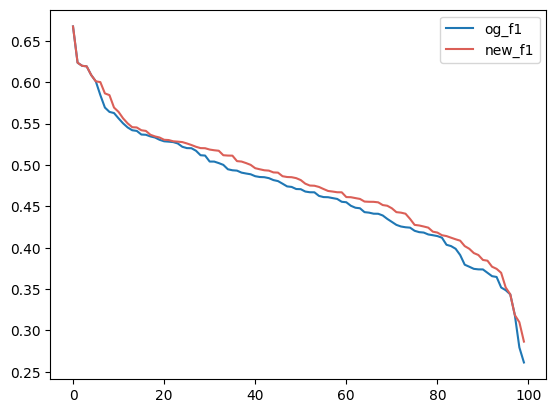

In [35]:
#IF we exclude the FYKE exercise books for yläkoulu, which are very different from all other books:
test_dff = getF1FromPredictionsList(snip_df, yläkoulu_kemia_kirjat)
sns.lineplot(test_dff[['og_f1']])
sns.lineplot(test_dff[['new_f1']].sort_values('new_f1', ascending=False).reset_index(drop=True), palette=sns.color_palette("hls", 1))

<Axes: >

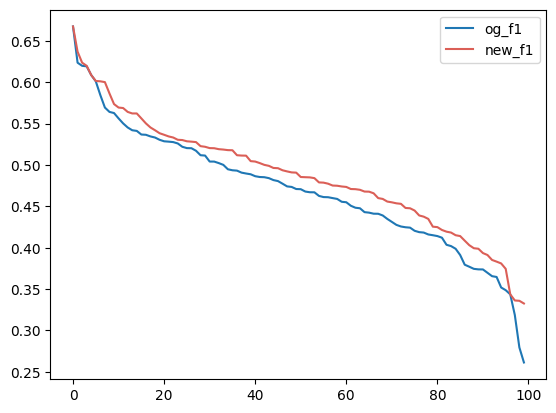

In [36]:
#IF we exclude the books which correlate negatively with f1 score if they are included in test set:
test_dff = getF1FromPredictionsList(snip_df, bad_test_books.index.to_numpy().tolist())
sns.lineplot(test_dff[['og_f1']])
sns.lineplot(test_dff[['new_f1']].sort_values('new_f1', ascending=False).reset_index(drop=True), palette=sns.color_palette("hls", 1))

<Axes: >

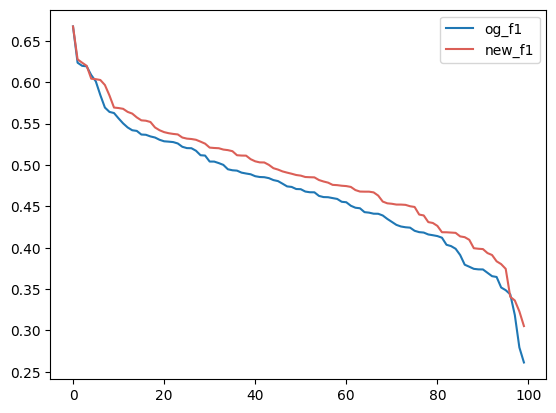

In [37]:
#IF we exclude the books which either correlate negatively with f1 score if in test OR correlate positively if they are not in test (aka are in train/eval):
test_dff = getF1FromPredictionsList(snip_df, all_detrimental_in_test)
sns.lineplot(test_dff[['og_f1']])
sns.lineplot(test_dff[['new_f1']].sort_values('new_f1', ascending=False).reset_index(drop=True), palette=sns.color_palette("hls", 1))

In [38]:
pprint(list(Counter(bad_test_books.index.to_numpy().tolist())))

Pretty printing has been turned OFF


In [39]:
pprint(list(Counter(bad_train_books.index.to_numpy().tolist())))

Pretty printing has been turned ON


In [40]:
pprint(list(Counter(bad_eval_books.index.to_numpy().tolist())))

Pretty printing has been turned OFF


In [41]:
pprint(list(Counter(good_train_books.index.to_numpy().tolist())))

Pretty printing has been turned ON


In [42]:
#plotF1AndNumberOfCorrelatingBooks(snip_df, 'train', False, 0.2)

In [43]:
from datasets import Dataset
base_dataset = Dataset.load_from_disk("TCBC_datasets/sniplen100_hpfv")
#Training dataset
train_ds_int = base_dataset.filter(lambda x: x['book_id'] in good_train_books.index.to_numpy().tolist())

/home/tenojo/miniconda3/envs/Test/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [44]:
def hh(df):
    print(np.array(df[df['sniplen']==100].sort_values('f1', ascending=False)[:10]['keylist_id'].to_numpy()))

In [45]:
hh(param_df_ovo_hpfv)
hh(param_df_ovr_hpfv)
hh(param_df_ovo_text)
hh(param_df_ovr_text)

[41 37 34 81  8 35 64 38 31 13]
[37 34  8 41 81 69 35 89 73 13]
[37 13 61 69 41 88 89 67 73 64]
[37 13 41 88 61 69 67 17 70 89]


In [46]:
def hp(df):
    print(np.array(df[df['keylist_id']==37].sort_values('f1', ascending=False).to_numpy()))

In [47]:
hp(param_df_ovo_hpfv)
hp(param_df_ovo_text)

[[ 37.         100.           0.623563  ]
 [ 37.          75.           0.60815736]
 [ 37.          50.           0.57879994]
 [ 37.          25.           0.50768374]
 [ 37.          10.           0.43426389]
 [ 37.           5.           0.39238976]]
[[ 37.         100.           0.67282771]
 [ 37.          75.           0.65533016]
 [ 37.          50.           0.64076292]
 [ 37.          25.           0.60028917]
 [ 37.          10.           0.56293082]
 [ 37.           5.           0.52641935]]


## Confusion matrix of best result

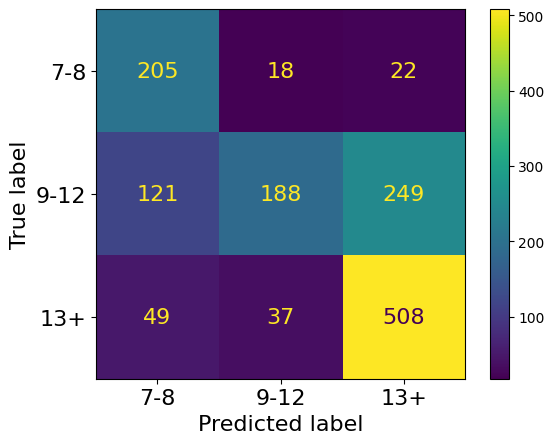

In [48]:
def showWantedConfMatrix(df, keylist_id):
    best_predicts = np.array(df[(df['sniplen']==100) & (df['keylist_id']==keylist_id)].sort_values('f1', ascending=False)[:1]['conf_matrix'].to_numpy()[0])
    best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

    def reOrderFromYoungToOld(predicts, labels):
        labels = ['7-8', '9-12', '13+']
        young = np.array([predicts[1][1], predicts[1][2], predicts[1][0]])
        mid = np.array([predicts[2][1], predicts[2][2], predicts[2][0]])
        old = np.array([predicts[0][1], predicts[0][2], predicts[0][0]])
        predicts = np.array([young, mid, old])
        return labels, predicts

    r_lables, r_predicts = reOrderFromYoungToOld(best_predicts, best_labels)

    label_font = {'size':'16'}
    p = metrics.ConfusionMatrixDisplay(confusion_matrix=r_predicts, display_labels=r_lables)
    p.plot(text_kw={'size':16})
    plt.gca().axes.tick_params(axis='both', which='major', labelsize=16)
    plt.gca().axes.set_xlabel("Predicted label", fontdict=label_font)
    plt.gca().axes.set_ylabel("True label", fontdict=label_font)
    plt.show()

showWantedConfMatrix(df_ovo_hpfv, 37)

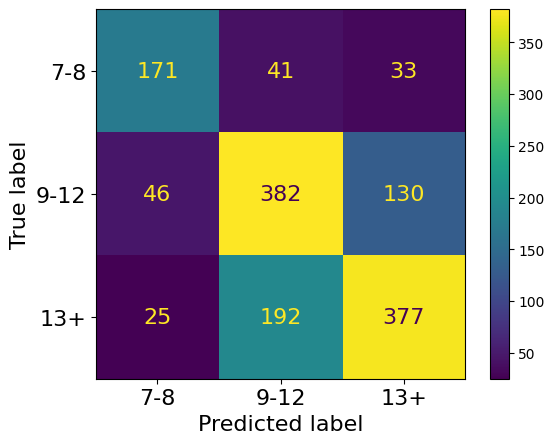

In [49]:
showWantedConfMatrix(df_ovo_text, 37)

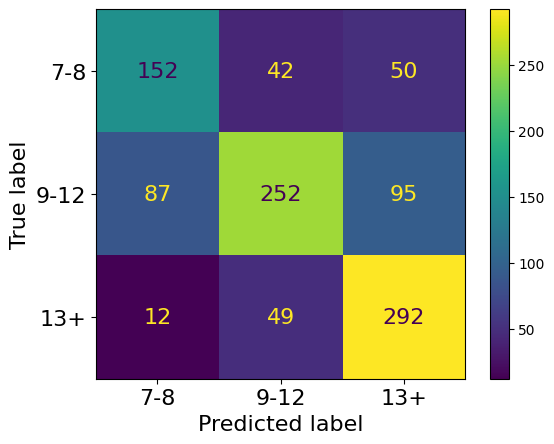

In [50]:
def showBestConfMatrix(df):
    best_predicts = np.array(df[df['sniplen']==100].sort_values('f1', ascending=False)[:1]['conf_matrix'].to_numpy()[0])
    best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

    def reOrderFromYoungToOld(predicts, labels):
        labels = ['7-8', '9-12', '13+']
        young = np.array([predicts[1][1], predicts[1][2], predicts[1][0]])
        mid = np.array([predicts[2][1], predicts[2][2], predicts[2][0]])
        old = np.array([predicts[0][1], predicts[0][2], predicts[0][0]])
        predicts = np.array([young, mid, old])
        return labels, predicts

    r_lables, r_predicts = reOrderFromYoungToOld(best_predicts, best_labels)

    label_font = {'size':'16'}
    p = metrics.ConfusionMatrixDisplay(confusion_matrix=r_predicts, display_labels=r_lables)
    p.plot(text_kw={'size':16})
    plt.gca().axes.tick_params(axis='both', which='major', labelsize=16)
    plt.gca().axes.set_xlabel("Predicted label", fontdict=label_font)
    plt.gca().axes.set_ylabel("True label", fontdict=label_font)
    plt.show()

showBestConfMatrix(df_ovo_hpfv)

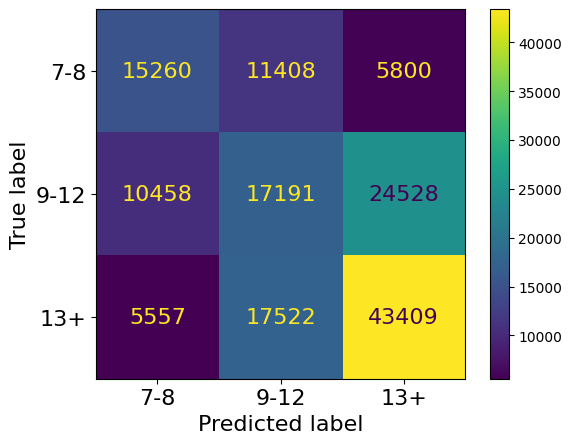

In [51]:
def showCombinedConfMatrix(df):
    best_predicts = np.array(df[df['sniplen']==100].sort_values('f1', ascending=False)['conf_matrix'].to_numpy().tolist())
    best_predicts_aggregated = sum(best_predicts)

    best_labels = df.sort_values('f1', ascending=False)[:1]['labels'].to_numpy()[0]

    def reOrderFromYoungToOld(predicts, labels):
        labels = ['7-8', '9-12', '13+']
        young = np.array([predicts[1][1], predicts[1][2], predicts[1][0]])
        mid = np.array([predicts[2][1], predicts[2][2], predicts[2][0]])
        old = np.array([predicts[0][1], predicts[0][2], predicts[0][0]])
        predicts = np.array([young, mid, old])
        return labels, predicts

    r_lables, r_predicts = reOrderFromYoungToOld(best_predicts_aggregated, best_labels)

    label_font = {'size':'16'}
    p = metrics.ConfusionMatrixDisplay(confusion_matrix=r_predicts, display_labels=r_lables)
    p.plot(text_kw={'size':16}, values_format='')
    plt.gca().axes.tick_params(axis='both', which='major', labelsize=16)
    plt.gca().axes.set_xlabel("Predicted label", fontdict=label_font)
    plt.gca().axes.set_ylabel("True label", fontdict=label_font)
    plt.show()

showCombinedConfMatrix(df_ovo_hpfv)

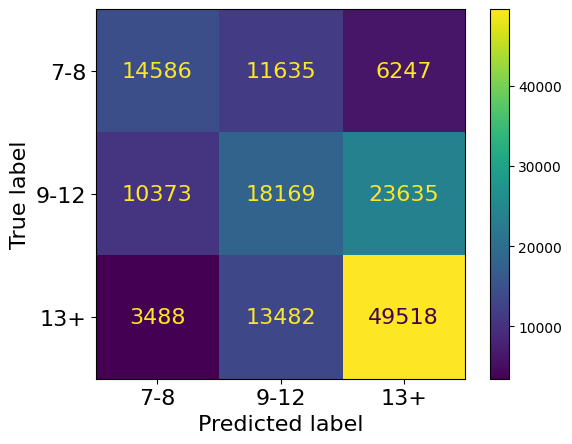

In [52]:
showCombinedConfMatrix(df_ovo_text)

## Insight into important featues if used HPFV

In [53]:
test_conllu_line = "1\tAikojen\taika\tNOUN\tN\tCase=Gen|Number=Plur\t2\tnsubj\t_\t_\n2\tkuluessa\tkulua\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n3\tmuinaisina\tmuinainen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t4\tamod\t_\t_\n4\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t5\tobl\t_\t_\n5\tsyntynyt\tsynty\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tpahuus\tpahuus\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t7\tnsubj\t_\t_\n7\tkasvaa\tkasvaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\ti\u00e4inen\ti\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t10\tamod\t_\t_\n10\tpimeys\tpimeys\tNOUN\tN\tCase=Nom|Derivation=Vs|Number=Sing\t12\tnsubj:cop\t_\t_\n11\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n12\tvalloillaan\tvalloillaan\tADV\tAdv\t_\t7\tconj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tyritt\u00e4\u00e4\tyritt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\tconj\t_\t_\n15\tsy\u00f6st\u00e4\tsy\u00f6st\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t14\txcomp\t_\t_\n16\tkoko\tkoko\tADJ\tA\t_\t17\tamod\t_\t_\n17\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t15\tobj\t_\t_\n18\tp\u00e4\u00e4ttym\u00e4tt\u00f6m\u00e4\u00e4n\tp\u00e4\u00e4ttym\u00e4t\u00f6n\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Ton|Number=Sing\t19\tamod\t_\t_\n19\ty\u00f6h\u00f6n\ty\u00f6\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tT\u00e4t\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Dem\t2\tdet\t_\t_\n2\tpahuutta\tpahuutta\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t5\tobj\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n4\tvoi\tvoida\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t5\taux\t_\t_\n5\tly\u00f6d\u00e4\tly\u00f6d\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n6\tkukaan\tkukaan\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t5\tnsubj\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n8\tpaitsi\tpaitsi\tADP\tAdp\t_\t18\tcase\t_\t_\n9\tyksi\tyksi\tNUM\tNum\tCase=Nom|Number=Sing|NumType=Card\t18\tnummod\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tainoa\tainoa\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tconj\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t13\tnsubj\t_\t_\n13\tvalitsema\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Agt|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t17\tnsubj\t_\t_\n16\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t15\tflat:name\t_\t_\n17\ttuleva\ttulla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tsankari\tsankari\tNOUN\tN\tCase=Nom|Number=Sing\t6\tappos\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tVirheet\u00f6n\tvirheet\u00f6n\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Ton|Number=Sing\t2\tamod\t_\t_\n2\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t5\tnsubj\t_\t_\n5\tkantaa\tkantaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tacl:relcl\t_\t_\n6\tvalon\tvalo\tNOUN\tN\tCase=Gen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tamulettia\tamuletti\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n9\tt\u00e4ydellisesti\tt\u00e4ydellisesti\tADV\tAdv\tDerivation=Sti\t10\tadvmod\t_\t_\n10\tt\u00e4ytt\u00e4\u00e4\tt\u00e4ytt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n11\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t12\tnmod:poss\t_\t_\n12\ttahdon\ttahto\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKun\tkun\tSCONJ\tC\t_\t4\tmark\t_\t_\n2\taika\taika\tNOUN\tN\tCase=Nom|Number=Sing\t4\tnsubj:cop\t_\t_\n3\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n4\tt\u00e4ysi\tt\u00e4ysi\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t7\tadvcl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t7\tnsubj\t_\t_\n7\tuhraa\tuhrata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n8\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t7\tobj\t_\t_\n9\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t7\tobl\t_\t_\n10\tpuolesta\tpuolesta\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t7\tobl\t_\t_\n12\tpimeytt\u00e4\tpimeys\tNOUN\tN\tCase=Par|Derivation=Vs|Number=Sing\t11\tnmod\t_\t_\n13\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n15\tmutta\tmutta\tCCONJ\tC\t_\t18\tcc\t_\t_\n16\tkuolemakaan\tkuolema\tNOUN\tN\tCase=Nom|Clitic=Kaan|Number=Sing\t18\tnsubj\t_\t_\n17\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t18\taux\t_\t_\n18\tsaa\tsaada\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t7\tconj\t_\t_\n19\th\u00e4nest\u00e4\th\u00e4n\tPRON\tPron\tCase=Ela|Number=Sing|Person=3|PronType=Prs\t18\tobl\t_\t_\n20\tvoittoa\tvoitto\tNOUN\tN\tCase=Par|Number=Sing\t18\tobj\t_\t_\n21\t.\t.\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n1\tValittu\tvalita\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t2\tnsubj\t_\t_\n2\tvoittaa\tvoittaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tlopullisesti\tlopullisesti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\tjoukkoineen\tjoukko\tNOUN\tN\tCase=Com|Person[psor]=3\t4\tnmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tmaailmaan\tmaailma\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n9\tpalaa\tpalata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\thyvyys\thyvyys\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n11\tja\tja\tCCONJ\tC\t_\t12\tcc\t_\t_\n12\trauha\trauha\tNOUN\tN\tCase=Nom|Number=Sing\t10\tconj\t_\t_\n13\tkuin\tkuin\tSCONJ\tC\t_\t15\tmark\t_\t_\n14\tentisin\u00e4\tentinen\tADJ\tA\tCase=Ess|Degree=Pos|Derivation=Inen|Number=Plur\t15\tamod\t_\t_\n15\taikoina\taika\tNOUN\tN\tCase=Ess|Number=Plur\t9\tadvcl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n4\tjotka\tjoka\tPRON\tPron\tCase=Nom|Number=Plur|PronType=Rel\t7\tnsubj\t_\t_\n5\tovat\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n6\tvalittua\tvalittu\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n7\tseuranneet\tseurata\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t2\tacl:relcl\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n9\tp\u00e4\u00e4sev\u00e4t\tp\u00e4\u00e4st\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n10\th\u00e4nen\th\u00e4n\tPRON\tPron\tCase=Gen|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n11\tkanssaan\tkanssa\tADP\tAdp\tAdpType=Post|Person[psor]=3\t10\tcase\t_\t_\n12\tValveuden\tvalveus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t9\tobl\t_\t_\n13\tluo\tluo\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tikuiseen\tikuinen\tADJ\tA\tCase=Ill|Degree=Pos|Derivation=Inen|Number=Sing\t15\tamod\t_\t_\n15\tiloon\tilo\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tJoten\tjoten\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tryhdy\tryhty\u00e4\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsin\u00e4kin\tsin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=2|PronType=Prs\t3\tnsubj\t_\t_\n5\tvalittu-ehdokkaaksi\tvalittu#ehdokas\tNOUN\tN\tCase=Tra|Number=Sing\t3\txcomp:ds\t_\t_\n6\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJos\tjos\tSCONJ\tC\t_\t3\tmark\t_\t_\n2\tet\tei\tAUX\tV\tNumber=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkuole\tkuolla\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t9\tadvcl\t_\t_\n4\theti\theti\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tensimm\u00e4isess\u00e4\tensimm\u00e4inen\tADJ\tNum\tCase=Ine|Derivation=Inen|Number=Sing|NumType=Ord\t6\tamod\t_\t_\n6\ttaistelussa\ttaistelu\tNOUN\tN\tCase=Ine|Derivation=U|Number=Sing\t3\tobl\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\tsaatat\tsaattaa\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n9\tvoittaa\tvoittaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n10\tikuisen\tikuinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tel\u00e4m\u00e4n\tel\u00e4m\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t9\tobj\t_\t_\n12\t!\t!\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n2\tEnt\u00e4\tent\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tjos\tjos\tSCONJ\tC\t_\t5\tmark\t_\t_\n4\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n5\thalua\thaluta\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n8\tmin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t9\tnsubj\t_\t_\n9\tkysyin\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t5\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\t\u00c4l\u00e4\tei\tAUX\tV\tMood=Imp|Number=Sing|Person=2|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n4\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n5\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n7\tjyr\u00e4htiv\u00e4t\tjyr\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n8\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t7\tnsubj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tOnko\tolla\tAUX\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tmeiss\u00e4\tmin\u00e4\tPRON\tPron\tCase=Ine|Number=Plur|PronType=Dem\t4\tobl\t_\t_\n4\tkeness\u00e4k\u00e4\u00e4n\tkukaan\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t0\troot\t_\t_\n5\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tnsubj:cop\t_\t_\n6\tpelastamisen\tpelastaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t7\tnmod:poss\t_\t_\n7\tarvoista\tarvoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t5\tnmod\t_\t_\n8\t?\t?\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSiet\u00e4isimme\tsiet\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Plur|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t1\tobj\t_\t_\n3\tkuolla\tkuolla\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t1\txcomp\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tparataxis\t_\t_\n7\tViikatemies\tviikate#mies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tParas\thyv\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t0\troot\t_\t_\n3\titse\titse\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\titsens\u00e4\titse\tPRON\tPron\tCase=Gen|Number=Sing|Person[psor]=3|Reflex=Yes\t5\tobj\t_\t_\n5\tpelastaa\tpelastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp:ds\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\ttokaisi\ttokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tTe\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=2|PronType=Prs\t3\tnsubj:cop\t_\t_\n3\tharhaoppiset\tharhaoppinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Plur\t0\troot\t_\t_\n4\t!\t!\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tHirteen\thirre\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n2\tjoudatte\tjoudattaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t!\t!\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n5\tpauhasivat\tpauhata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\thyvikset\thyvi\tADJ\tA\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMin\u00e4\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=1|PronType=Prs\t3\tnsubj\t_\t_\n2\ten\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tuskaltanut\tuskaltaa\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tmainitakaan\tmainita\tVERB\tV\tClitic=Kaan|InfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\txcomp\t_\t_\n5\tmuista\tmuu\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t6\tdet\t_\t_\n6\tmahdollisuuksista\tmahdollisuus\tNOUN\tN\tCase=Ela|Derivation=Llinen,Vs|Number=Plur\t4\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tniin\tniin\tADV\tAdv\t_\t9\tadvmod\t_\t_\n9\tlopetin\tlopettaa\tVERB\tV\tMood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n10\tt\u00e4m\u00e4n\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t11\tdet\t_\t_\n11\tpaperin\tpaperi\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\ttuhlaamisen\ttuhlaaminen\tNOUN\tN\tCase=Gen|Derivation=Minen|Number=Sing\t9\tobj\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n14\tkoska\tkoska\tSCONJ\tC\t_\t16\tmark\t_\t_\n15\ttila\ttila\tNOUN\tN\tCase=Nom|Number=Sing\t16\tnsubj\t_\t_\n16\tloppuu\tloppua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tadvcl\t_\t_\n17\tja\tja\tCCONJ\tC\t_\t21\tcc\t_\t_\n18\tminun\tmin\u00e4\tPRON\tPron\tCase=Gen|Number=Sing|Person=1|PronType=Prs\t21\tnsubj\t_\t_\n19\tpit\u00e4isi\tpit\u00e4\u00e4\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t21\taux\t_\t_\n20\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t21\taux\t_\t_\n21\ttekem\u00e4ss\u00e4\ttehd\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t16\tconj\t_\t_\n22\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t24\tdet\t_\t_\n23\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t24\tadvmod\t_\t_\n24\thy\u00f6dyllist\u00e4\thy\u00f6dyllinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t21\tobj\t_\t_\n25\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsyv\u00e4\u00e4n\tsyv\u00e4\u00e4n\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tkyn\u00e4n\tkyn\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\tmustepulloon\tmuste#pullo\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t9\txcomp\t_\t_\n11\thorisonttiin\thorisontti\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tPahuksen\tpahus\tNOUN\tN\tCase=Gen|Number=Sing\t3\tnmod:poss\t_\t_\n3\tprofetia\tprofetia\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLinnan\tlinna\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkorkeimmasta\tkorkea\tADJ\tA\tCase=Ela|Degree=Sup|Number=Sing\t3\tamod\t_\t_\n3\ttornista\ttorni\tNOUN\tN\tCase=Ela|Number=Sing\t4\tobl\t_\t_\n4\tn\u00e4ki\tn\u00e4hd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=0|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tymp\u00e4r\u00f6iv\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n6\tkaupungin\tkaupunki\tNOUN\tN\tCase=Gen|Number=Sing\t11\tnmod\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tpeltomaiden\tpelto#maa\tNOUN\tN\tCase=Gen|Number=Plur\t6\tconj\t_\t_\n9\tyli\tyli\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n10\tautioon\tautio\tADJ\tA\tCase=Ill|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\treunaseutuun\treuna#seutu\tNOUN\tN\tCase=Ill|Number=Sing\t4\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t15\tpunct\t_\t_\n13\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t15\tnsubj\t_\t_\n14\tv\u00e4hitellen\tv\u00e4hitellen\tADV\tAdv\t_\t15\tadvmod\t_\t_\n15\tnousi\tnousta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tacl:relcl\t_\t_\n16\tsynkkyytt\u00e4\tsynkkyys\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\thuokuvaksi\thuokua\tVERB\tV\tCase=Tra|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tvuoristoksi\tvuoristo\tNOUN\tN\tCase=Tra|Number=Sing\t15\txcomp\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsiirtyi\tsiirty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvieress\u00e4\u00e4n\tvieress\u00e4\tADV\tAdv\tPerson[psor]=3\t4\tadvmod\t_\t_\n4\tolevan\tolla\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t6\tacl\t_\t_\n5\tjyhke\u00e4n\tjyhke\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tkaukoputken\tkauko#putki\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobl\t_\t_\n7\t\u00e4\u00e4relle\t\u00e4\u00e4ri\tADP\tAdp\tAdpType=Post\t6\tcase\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t9\tobl\t_\t_\n11\ttaas\ttaas\tADV\tAdv\t_\t9\tadvmod\t_\t_\n12\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t14\tobl\t_\t_\n13\tv\u00e4liin\tv\u00e4liin\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\tj\u00e4\u00e4v\u00e4\u00e4n\tj\u00e4\u00e4d\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t15\tacl\t_\t_\n15\tsolaan\tsola\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t18\tpunct\t_\t_\n17\tmiss\u00e4\tmik\u00e4\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Rel\t18\tobl\t_\t_\n18\tkulki\tkulkea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t15\tacl:relcl\t_\t_\n19\tvaltakunnat\tvalta#kunta\tNOUN\tN\tCase=Nom|Number=Plur\t20\tobj\t_\t_\n20\tyhdist\u00e4v\u00e4\tyhdist\u00e4\u00e4\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t21\tacl\t_\t_\n21\tvaltatie\tvalta#tie\tNOUN\tN\tCase=Nom|Number=Sing\t18\tnsubj\t_\t_\n22\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tTaistelu\ttaistelu\tNOUN\tN\tCase=Nom|Derivation=U|Number=Sing\t6\tnsubj:cop\t_\t_\n2\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n4\tedelleen\tedelleen\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tt\u00e4ydess\u00e4\tt\u00e4ysi\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\tvauhdissa\tvauhti\tNOUN\tN\tCase=Ine|Number=Sing\t0\troot\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tOn\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tcop\t_\t_\n3\ttuokin\ttuokin\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t6\tnsubj:cop\t_\t_\n4\ttaas\ttaas\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tj\u00e4rkev\u00e4\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t6\tamod\t_\t_\n6\ttapa\ttapa\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n7\tkuluttaa\tkuluttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tacl\t_\t_\n8\taikaa\taika\tNOUN\tN\tCase=Par|Number=Sing\t7\tobj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tresursseja\tresurssi\tNOUN\tN\tCase=Par|Number=Plur\t8\tconj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tLuulisi\tluulla\tVERB\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n3\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t8\tmark\t_\t_\n4\tnelj\u00e4ss\u00e4\tnelj\u00e4\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t5\tcompound\t_\t_\n5\tsadassa\tsata\tNUM\tNum\tCase=Ine|Number=Sing|NumType=Card\t6\tnummod\t_\t_\n6\tvuodessa\tvuosi\tNOUN\tN\tCase=Ine|Number=Sing\t8\tobl\t_\t_\n7\tihminen\tihminen\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\tkeksisi\tkeksi\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t1\tccomp\t_\t_\n9\tj\u00e4rkev\u00e4\u00e4kin\tj\u00e4rkev\u00e4\tADJ\tA\tCase=Nom|Clitic=Kin|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n10\ttekemist\u00e4\ttekeminen\tNOUN\tN\tCase=Par|Derivation=Minen|Number=Sing\t8\tobj\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t17\tpunct\t_\t_\n12\tmutta\tmutta\tCCONJ\tC\t_\t17\tcc\t_\t_\n13\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t17\taux\t_\t_\n14\tn\u00e4ht\u00e4v\u00e4sti\tn\u00e4hd\u00e4\tVERB\tV\tDerivation=Sti\t17\tadvmod\t_\t_\n15\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n16\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t17\tnsubj\t_\t_\n17\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n18\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n19\thitusen\thitusen\tADV\tAdv\t_\t17\tadvmod\t_\t_\n20\t,\t,\tPUNCT\tPunct\t_\t23\tpunct\t_\t_\n21\tjotta\tjotta\tSCONJ\tC\t_\t23\tmark\t_\t_\n22\tn\u00e4kyviin\tn\u00e4ky\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Plur|PartForm=Pres|VerbForm=Part|Voice=Act\t23\txcomp\t_\t_\n23\ttuli\ttulla\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t17\tadvcl\t_\t_\n24\tvuorenrinteell\u00e4\tvuoren#rinne\tNOUN\tN\tCase=Ade|Number=Sing\t25\tobl\t_\t_\n25\tseisoskeleva\tseisoskella\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t26\tacl\t_\t_\n26\thahmo\thahmo\tNOUN\tN\tCase=Nom|Number=Sing\t23\tnsubj\t_\t_\n27\tmustassa\tmusta\tADJ\tA\tCase=Ine|Degree=Pos|Number=Sing\t28\tamod\t_\t_\n28\thaarniskassa\thaarniska\tNOUN\tN\tCase=Ine|Number=Sing\t26\tnmod\t_\t_\n29\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tPatsastelet\tpatsastella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tsiell\u00e4\tsiell\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\tlatelet\tladella\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tmahtipontisia\tmahtipontinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t7\tamod\t_\t_\n7\tsolvauksia\tsolvaus\tNOUN\tN\tCase=Par|Number=Plur\t5\tobj\t_\t_\n8\tep\u00e4k\u00e4yt\u00e4nn\u00f6llisten\tep\u00e4#k\u00e4yt\u00e4nn\u00f6llinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Plur\t9\tamod\t_\t_\n9\tpiikkikoristeidesi\tpiikki#koriste\tNOUN\tN\tCase=Gen|Number=Plur|Number[psor]=Sing|Person[psor]=1\t5\tobl\t_\t_\n10\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t9\tcase\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMuuttuisit\tmuuttua\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tjo\tjo\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\tlohik\u00e4\u00e4rmeeksi\tlohi#k\u00e4\u00e4rme\tNOUN\tN\tCase=Tra|Number=Sing\t1\txcomp\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttyhjent\u00e4isit\ttyhjent\u00e4\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t1\tconj\t_\t_\n6\tkoko\tkoko\tADJ\tA\t_\t7\tamod\t_\t_\n7\ttantereen\ttantere\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTai\ttai\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\taivopesisit\taivopesita\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tvastustajat\tvastustaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Plur\t2\tobj\t_\t_\n4\ttai\ttai\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\ttekisit\ttehd\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tjotain\tjokin\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t5\tobj\t_\t_\n7\tkaikilla\tkaikki\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Ind\t8\tdet\t_\t_\n8\tylivoimillasi\tyli#voima\tADJ\tA\tCase=Ade|Number=Plur|Number[psor]=Sing|Person[psor]=2\t5\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMutta\tmutta\tCCONJ\tC\t_\t2\tcc\t_\t_\n2\tleikki\u00e4h\u00e4n\tleikki\tNOUN\tN\tCase=Nom|Clitic=Han|Number=Sing\t0\troot\t_\t_\n3\tt\u00e4m\u00e4\tt\u00e4m\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t2\tnsubj:cop\t_\t_\n4\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t2\tdet\t_\t_\n5\tsinulle\tsin\u00e4\tPRON\tPron\tCase=All|Number=Sing|Person=2|PronType=Prs\t2\tobl\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\ton\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tcop\t_\t_\n8\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tToisten\ttoinen\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Rcp\t2\tnmod:gsubj\t_\t_\n2\tkustannuksella\tkustannus\tNOUN\tN\tCase=Ade|Number=Sing\t0\troot\t_\t_\n3\t...\t...\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tk\u00e4\u00e4nsi\tk\u00e4\u00e4nt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttaas\ttaas\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tkaukoputkea\tkauko#putki\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\tja\tja\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tbongasi\tbongata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tteinipojan\tteini#poika\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnsubj\t_\t_\n8\tniitt\u00e4m\u00e4ss\u00e4\tniitt\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\txcomp:ds\t_\t_\n9\tluurankosotilaita\tluuran#koso#tilaita\tNOUN\tN\tCase=Par|Number=Plur\t8\tobj\t_\t_\n10\tleimuavalla\tleimuta\tVERB\tV\tCase=All|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t11\tacl\t_\t_\n11\tmiekalla\tmiekka\tNOUN\tN\tCase=Ade|Number=Sing\t8\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t0\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n2\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t5\tnsubj\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n5\tosoitteli\tosoitella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\tsyytt\u00e4v\u00e4sti\tsyytt\u00e4v\u00e4sti\tADV\tAdv\tDerivation=Sti\t5\tadvmod\t_\t_\n7\tilmaa\tilma\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n9\t\"\t\"\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n10\ttyhj\u00e4np\u00e4iv\u00e4inen\ttyhj\u00e4n#p\u00e4iv\u00e4inen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t11\tamod\t_\t_\n11\tkynttil\u00e4nvalaja\tkynttil\u00e4n#valaja\tNOUN\tN\tCase=Nom|Number=Sing\t2\tappos\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n13\tluulet\tluulla\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n14\tolevasi\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|Number[psor]=Sing|PartForm=Pres|Person[psor]=2|VerbForm=Part|Voice=Act\t16\tcop\t_\t_\n15\toikeasti\toikeasti\tADV\tAdv\tDerivation=Sti\t16\tadvmod\t_\t_\n16\tmerkityksellinen\tmerkityksellinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t13\txcomp\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMik\u00e4\tmik\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n2\tmuka\tmuka\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\ttekee\ttehd\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tsinusta\tsin\u00e4\tPRON\tPron\tCase=Ela|Number=Sing|Person=2|PronType=Prs\t3\tobl\t_\t_\n5\tenemm\u00e4n\tenemm\u00e4n\tADV\tAdv\t_\t6\tadvmod\t_\t_\n6\tvalitun\tvalita\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Pass\t3\tobj\t_\t_\n7\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tjoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t9\tdet\t_\t_\n9\ttoinen\ttoinen\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rcp\t5\tadvcl\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\th\u00e4h\th\u00e4h\tINTJ\tInterj\t_\t3\tdiscourse\t_\t_\n12\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJoku\tjoku\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t3\tnsubj\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t3\tadvmod\t_\t_\n3\tp\u00e4\u00e4tti\tp\u00e4\u00e4tt\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n6\tsin\u00e4\tsin\u00e4\tPRON\tPron\tCase=Nom|Number=Sing|Person=2|PronType=Prs\t9\tnsubj:cop\t_\t_\n7\tnyt\tnyt\tADV\tAdv\t_\t9\tadvmod\t_\t_\n8\tolet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t9\tcop\t_\t_\n9\tt\u00e4rkein\tt\u00e4rke\u00e4\tADJ\tA\tCase=Nom|Degree=Sup|Number=Sing\t3\tccomp\t_\t_\n10\tkaikista\tkaikki\tPRON\tPron\tCase=Ela|Number=Plur|PronType=Ind\t9\tnmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tOlet\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tcop\t_\t_\n2\tihan\tihan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n3\tyht\u00e4\tyht\u00e4\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tlailla\tlailla\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tmurhaaja\tmurhaaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t0\troot\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\ttuhoaja\ttuhoaja\tNOUN\tN\tCase=Nom|Derivation=Ja|Number=Sing\t5\tconj\t_\t_\n8\tkuin\tkuin\tSCONJ\tC\t_\t9\tmark\t_\t_\n9\tmuutkin\tmuu\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Plur|PronType=Ind\t5\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tTuhlaat\ttuhlata\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tel\u00e4m\u00e4\u00e4si\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t1\tobj\t_\t_\n3\tjatkuvasti\tjatkuvasti\tADV\tAdv\tDerivation=Sti\t1\tadvmod\t_\t_\n4\ttapellen\ttapella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t1\tadvcl\t_\t_\n5\tsiihen\tse\tPRON\tPron\tCase=Ill|Number=Sing|PronType=Dem\t4\tobl\t_\t_\n6\tasti\tasti\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n8\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n9\tPimeydenvaltias\tpimeyden#valtias\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\thaluaa\thaluta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n11\tvaihtaa\tvaihtaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t10\txcomp\t_\t_\n12\tvalittua\tvalittua\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Pass\t11\tobj\t_\t_\n13\tja\tja\tCCONJ\tC\t_\t14\tcc\t_\t_\n14\tpist\u00e4\u00e4\tpist\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t11\tconj\t_\t_\n15\tsinut\tsin\u00e4\tPRON\tPron\tCase=Acc|Number=Sing|Person=2|PronType=Prs\t14\tobj\t_\t_\n16\tpois\tpois\tADV\tAdv\t_\t14\tadvmod\t_\t_\n17\tp\u00e4ivilt\u00e4\tp\u00e4iv\u00e4\tNOUN\tN\tCase=Abl|Number=Plur\t16\tnmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n19\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tTornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t2\tnmod:poss\t_\t_\n2\tkattoparrujen\tkatto#parru\tNOUN\tN\tCase=Gen|Number=Plur\t4\tobl\t_\t_\n3\tv\u00e4list\u00e4\tv\u00e4list\u00e4\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\tkuului\tkuulua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\trahinaa\trahina\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n7\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t8\tnmod:poss\t_\t_\n8\thuomio\thuomio\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkiinnittyi\tkiinnitty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n10\t\u00e4\u00e4neen\t\u00e4\u00e4neen\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tPikkuinen\tpikkuinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t4\tamod\t_\t_\n2\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n3\tvaaleanvioletti\tvaalean#violetti\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\tlirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\ther\u00e4si\ther\u00e4t\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\taamu-uniltaan\taamu#unillas\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t8\tcc\t_\t_\n8\tverrytteli\tverrytell\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tconj\t_\t_\n9\tnahkaisia\tnahkainen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Plur\t10\tamod\t_\t_\n10\tsiipi\u00e4\u00e4n\tsiipi\tNOUN\tN\tCase=Par|Number=Plur|Person[psor]=3\t8\tobj\t_\t_\n11\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tel\u00e4int\u00e4\tel\u00e4in\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n4\tniin\tniin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tkauan\tkauan\tADV\tAdv\t_\t2\tadvmod\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n7\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t9\tmark\t_\t_\n8\tsekin\tse\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|PronType=Dem\t9\tnsubj\t_\t_\n9\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n10\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t9\tobj\t_\t_\n11\th\u00e4neen\th\u00e4n\tPRON\tPron\tCase=Ill|Number=Sing|Person=3|PronType=Prs\t9\tobl\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tkallisti\tkallistaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t9\tconj\t_\t_\n14\tv\u00e4h\u00e4n\tv\u00e4h\u00e4n\tADV\tAdv\t_\t13\tadvmod\t_\t_\n15\tuntuvaista\tuntua\tVERB\tV\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t16\tacl\t_\t_\n16\tp\u00e4\u00e4t\u00e4\u00e4n\tp\u00e4\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n17\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n2\tEtt\u00e4\tett\u00e4\tSCONJ\tC\t_\t10\tmark\t_\t_\n3\tnoiden\ttuo\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t5\tdet\t_\t_\n4\tkahden\tkaksi\tNUM\tNum\tCase=Gen|Number=Sing|NumType=Card\t5\tnummod\t_\t_\n5\tidiootin\tidiootti\tNOUN\tN\tCase=Gen|Number=Sing\t10\tobl\t_\t_\n6\tymp\u00e4rill\u00e4\tymp\u00e4rill\u00e4\tADP\tAdp\tAdpType=Post\t5\tcase\t_\t_\n7\tsitten\tsitten\tADV\tAdv\t_\t10\tadvmod\t_\t_\n8\tkoko\tkoko\tADJ\tA\t_\t9\tamod\t_\t_\n9\tmaailma\tmaailma\tNOUN\tN\tCase=Nom|Number=Sing\t10\tnsubj\t_\t_\n10\tpy\u00f6rii\tpy\u00f6ri\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n11\t!\t!\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n12\t\"\t\"\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n13\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t14\tnsubj\t_\t_\n14\tjatkoi\tjatkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t10\tparataxis\t_\t_\n15\tselostustaan\tselostus\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t14\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n2\tSin\u00e4kin\tsin\u00e4kin\tADV\tAdv\tClitic=Kin\t6\tnsubj\t_\t_\n3\tvarmasti\tvarmasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n4\thiljaa\thiljaa\tADV\tAdv\t_\t6\tadvmod\t_\t_\n5\tmieless\u00e4si\tmieli\tNOUN\tN\tNumber[psor]=Sing|Person[psor]=2\t4\tnmod\t_\t_\n6\tnaurat\tnauraa\tVERB\tV\tMood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n7\tmeille\tmin\u00e4\tPRON\tPron\tCase=All|Number=Plur|Person=1|PronType=Prs\t8\tdet\t_\t_\n8\tihmisille\tihminen\tNOUN\tN\tCase=All|Number=Plur\t6\tobl\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n1\tEtk\u00f6\tei\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n2\tvain\tvain\tADV\tAdv\t_\t1\tadvmod\t_\t_\n3\t?\t?\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n2\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t3\taux\t_\t_\n3\tkommentoinut\tkommentoida\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n4\tasiaa\tasia\tNOUN\tN\tCase=Par|Number=Sing\t3\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tvaan\tvaan\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\talkoi\talkaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tconj\t_\t_\n8\tsukia\tsukia\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t7\txcomp\t_\t_\n9\titse\u00e4\u00e4n\titse\tPRON\tPron\tCase=Par|Number=Sing|Person[psor]=3|Reflex=Yes\t8\tobj\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMieskin\tmies\tNOUN\tN\tCase=Nom|Clitic=Kin|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkatseensa\tkatse\tNOUN\tN\tCase=Nom|Number=Plur|Person[psor]=3\t2\tobj\t_\t_\n4\tharmaan\tharmaa\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t10\tamod\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tm\u00f6yhe\u00e4n\tm\u00f6yhe\u00e4\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tconj\t_\t_\n7\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n8\tauringossa\taurinko\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n9\tkiiltelev\u00e4n\tkiillell\u00e4\tVERB\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t4\tconj\t_\t_\n10\taamutakkinsa\taamu#takki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t11\tnmod:poss\t_\t_\n11\thelmoihin\thelma\tNOUN\tN\tCase=Ill|Number=Plur\t2\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n2\tTied\u00e4tk\u00f6\ttiet\u00e4\u00e4\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Style=Coll|Tense=Pres|VerbForm=Fin|Voice=Act\t8\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tmin\u00e4kin\tmin\u00e4\tPRON\tPron\tCase=Nom|Clitic=Kin|Number=Sing|Person=1|PronType=Prs\t8\tnsubj\t_\t_\n5\tvoisin\tvoida\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t8\taux\t_\t_\n6\tolla\tolla\tAUX\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t8\taux\t_\t_\n7\ttuolla\ttuolla\tADV\tAdv\t_\t8\tadvmod\t_\t_\n8\ttaistelemassa\ttaistella\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n1\tSama\tsama\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t0\troot\t_\t_\n2\tkumpaa\tkumpi\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t1\tnmod\t_\t_\n3\tvastaan\tvastaan\tADP\tAdp\tAdpType=Post\t2\tcase\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t1\tpunct\t_\t_\n1\tKyll\u00e4\tkyll\u00e4\tADV\tAdv\t_\t4\tadvmod\t_\t_\n2\tvaihtoehtoja\tvaihto#ehto\tNOUN\tN\tCase=Par|Number=Plur\t4\tnsubj\t_\t_\n3\tolisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=3|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tollut\tolla\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tmutta\tmutta\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\tei\tei\tVERB\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tJoutava\tjoutava\tADJ\tA\tCase=Nom|Degree=Pos|Number=Sing\t2\tamod\t_\t_\n2\tpelkuri\tpelkuri\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tKaukainen\tkaukainen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Inen|Number=Sing\t2\tamod\t_\t_\n2\tjyty\tjyty\tNOUN\tN\tCase=Nom|Number=Sing\t3\tnsubj\t_\t_\n3\tkaikui\tkaikua\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\tyli\tyli\tADP\tAdp\tAdpType=Prep\t5\tcase\t_\t_\n5\tmaan\tmaa\tNOUN\tN\tCase=Gen|Number=Sing\t3\tobl\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t10\tpunct\t_\t_\n7\tkun\tkun\tSCONJ\tC\t_\t10\tmark\t_\t_\n8\tsynk\u00e4t\tsynkk\u00e4\tADJ\tA\tCase=Nom|Degree=Pos|Number=Plur\t9\tamod\t_\t_\n9\tpilvet\tpilvi\tNOUN\tN\tCase=Nom|Number=Plur\t10\tnsubj\t_\t_\n10\tvy\u00f6ryiv\u00e4t\tvy\u00f6ry\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tadvcl\t_\t_\n11\tvuoristoon\tvuoristo\tNOUN\tN\tCase=Ill|Number=Sing\t10\tobl\t_\t_\n12\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n13\tvarjostaen\tvarjostaa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t10\tadvcl\t_\t_\n14\ttaistelukent\u00e4n\ttaistelu#kentt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing\t13\tobj\t_\t_\n15\tdramaattisesti\tdramaattisesti\tADV\tAdv\tDerivation=Sti\t13\tadvmod\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tvilkaisi\tvilkaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpitelem\u00e4\u00e4ns\u00e4\tpidell\u00e4\tVERB\tV\tCase=Par|Degree=Pos|Number=Sing|PartForm=Agt|Person[psor]=3|VerbForm=Part|Voice=Act\t4\tacl\t_\t_\n4\tpaperia\tpaperi\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\trepi\trepi\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t6\tobj\t_\t_\n8\tpieneksi\tpieni\tADJ\tA\tCase=Tra|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tsilpuksi\tsilppu\tNOUN\tN\tCase=Tra|Derivation=U|Number=Sing\t6\txcomp:ds\t_\t_\n10\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n11\tpuristi\tpuristaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n12\tsilpun\tsilppu\tNOUN\tN\tCase=Gen|Number=Sing\t11\tobj\t_\t_\n13\tnyrkkiin\tnyrkki\tNOUN\tN\tCase=Ill|Number=Sing\t11\tobl\t_\t_\n14\tja\tja\tCCONJ\tC\t_\t15\tcc\t_\t_\n15\tnojasi\tnojata\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n16\tmurahdellen\tmurahdella\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t15\tadvcl\t_\t_\n17\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t18\tnmod:poss\t_\t_\n18\tkivikaiteeseen\tkivi#kaide\tNOUN\tN\tCase=Ill|Number=Sing\t15\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tKuka\tkuka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Int\t3\tnsubj\t_\t_\n3\ttiet\u00e4\u00e4\ttiet\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n5\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t6\tdet\t_\t_\n6\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t9\tobj\t_\t_\n7\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t9\taux\t_\t_\n8\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t9\taux\t_\t_\n9\test\u00e4\u00e4\test\u00e4\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tccomp\t_\t_\n10\t...\t...\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n11\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkaukaisuuteen\tkaukaisuus\tNOUN\tN\tCase=Ill|Derivation=Inen,Vs|Number=Sing\t2\tobl\t_\t_\n4\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tynse\u00e4sti\tynse\u00e4sti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\tel\u00e4imeen\tel\u00e4in\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tRupesitko\truvea\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tkantelemaan\tkandella\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tValveudelle\tvalveus\tNOUN\tN\tCase=All|Number=Sing\t3\tobl\t_\t_\n5\thirvitt\u00e4vist\u00e4\thirvitt\u00e4v\u00e4\tADJ\tA\tCase=Ela|Degree=Pos|Number=Plur\t6\tamod\t_\t_\n6\tkyseenalaistuksistani\tkyseenalaistus\tNOUN\tN\tCase=Ela|Number=Plur|Number[psor]=Sing|Person[psor]=1\t3\tobl\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tLirpakko\tlirpakko\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tpiti\tpit\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpienen\tpieni\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t4\tamod\t_\t_\n4\ttauon\ttauko\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsirkutti\tsirkuttaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n7\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tkatsoi\tkatsoa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tmieheen\tmies\tNOUN\tN\tCase=Ill|Number=Sing\t9\tobl\t_\t_\n12\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tJoo\tjoo\tINTJ\tInterj\t_\t4\tdiscourse\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\tanna\tantaa\tVERB\tV\tMood=Imp|Number=Sing|Person=2|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n5\tmenn\u00e4\tmenn\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp:ds\t_\t_\n6\tvaan\tvaan\tADV\tAdv\t_\t5\tadvmod\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\traskaasti\traskaasti\tADV\tAdv\tDerivation=Sti\t2\tadvmod\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\ttuijotti\ttuijottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\thetken\thetki\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobl\t_\t_\n7\ttyhjyyteen\ttyhjyys\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n10\tsitten\tsitten\tADV\tAdv\t_\t9\tadvmod\t_\t_\n11\tsilppua\tsilppu\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n12\tlirpakkoa\tlirpakko\tNOUN\tN\tCase=Par|Number=Sing\t9\tobl\t_\t_\n13\tkohti\tkohti\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTarvitsetko\ttarvita\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Sing|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t2\tadvmod\t_\t_\n4\tpes\u00e4\u00e4si\tpes\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Sing|Person[psor]=2\t2\tobj\t_\t_\n5\tt\u00e4ytett\u00e4\tt\u00e4yte\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tYst\u00e4v\u00e4llinen\tyst\u00e4v\u00e4llinen\tADJ\tA\tCase=Nom|Degree=Pos|Derivation=Llinen|Number=Sing\t3\tamod\t_\t_\n3\tajatus\tajatus\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n4\tsir\tsir\tNOUN\tN\t_\t3\tdiscourse\t_\t_\n5\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n6\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tPaperinpalat\tpaperi#palat\tNOUN\tN\tCase=Nom|Number=Plur\t2\tnsubj\t_\t_\n2\troiskahtivat\troiskahtia\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tilmaan\tilma\tNOUN\tN\tCase=Ill|Number=Sing\t2\tobl\t_\t_\n4\tmiehen\tmies\tNOUN\tN\tCase=Gen|Number=Sing\t5\tnsubj\t_\t_\n5\ts\u00e4ik\u00e4ht\u00e4ess\u00e4\ts\u00e4ik\u00e4ht\u00e4\u00e4\tVERB\tV\tCase=Ine|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHeti\theti\tADV\tAdv\t_\t5\tadvmod\t_\t_\n2\tper\u00e4\u00e4n\tper\u00e4\u00e4n\tADV\tAdv\t_\t1\tfixed\t_\t_\n3\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n4\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\ttajusi\ttajuta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\ttulijan\ttulija\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing\t8\tnsubj:cop\t_\t_\n7\tolevan\tolla\tAUX\tV\tCase=Gen|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t8\tcop\t_\t_\n8\tykk\u00f6sneuvonantajansa\tykk\u00f6s#neuvonantaja\tNOUN\tN\tCase=Gen|Derivation=Ja|Number=Sing|Person[psor]=3\t5\tccomp\t_\t_\n9\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n10\tjoka\tjoka\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Rel\t12\tnsubj\t_\t_\n11\toli\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t12\taux\t_\t_\n12\tsaapunut\tsaapua\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t8\tacl:relcl\t_\t_\n13\tt\u00e4ydellisen\tt\u00e4ydellinen\tADJ\tA\tCase=Gen|Degree=Pos|Derivation=Llinen|Number=Sing\t14\tamod\t_\t_\n14\thuomaamattomasti\thuomaamattomasti\tADV\tAdv\tDerivation=Sti\t12\tadvmod\t_\t_\n15\tpaikalle\tpaikka\tNOUN\tN\tCase=All|Number=Sing\t12\tobl\t_\t_\n16\t,\t,\tPUNCT\tPunct\t_\t19\tpunct\t_\t_\n17\tkuten\tkuten\tSCONJ\tC\t_\t19\tmark\t_\t_\n18\thovimestarien\thovi#mestari\tNOUN\tN\tCase=Gen|Number=Plur\t19\tnsubj\t_\t_\n19\tkuuluikin\tkuulua\tVERB\tV\tClitic=Kin|Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t8\tadvcl\t_\t_\n20\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tHuomenta\tHuomenta\tINTJ\tInterj\t_\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tvocative\t_\t_\n5\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n7\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t8\tnsubj\t_\t_\n8\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tAamukahvinne\taamu#kahvinne\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n4\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t5\tnsubj\t_\t_\n5\tojensi\tojentaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n6\ttarjottimella\ttarjotin\tNOUN\tN\tCase=Ade|Number=Sing\t5\tobl\t_\t_\n7\tsuurta\tsuuri\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t8\tamod\t_\t_\n8\tsavimukia\tsavi#muki\tNOUN\tN\tCase=Par|Number=Sing\t5\tobj\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tKiitos\tkiitos\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n3\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n5\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t6\tnsubj\t_\t_\n6\tmutisi\tmutista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tparataxis\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t8\tpunct\t_\t_\n8\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n9\tmukin\tmuki\tNOUN\tN\tCase=Gen|Number=Sing\t8\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tk\u00e4\u00e4ntyi\tk\u00e4\u00e4nty\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\ttaas\ttaas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\tkatsomaan\tkatsoa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t11\txcomp\t_\t_\n14\tvuorten\tvuori\tNOUN\tN\tCase=Gen|Number=Plur\t15\tnmod:poss\t_\t_\n15\tsolaa\tsola\tNOUN\tN\tCase=Par|Number=Sing\t13\tobj\t_\t_\n16\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tlaski\tlaskea\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\ttarjottimen\ttarjotin\tNOUN\tN\tCase=Gen|Number=Sing\t2\tobj\t_\t_\n4\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n5\totti\tottaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\taskeleen\taskel\tNOUN\tN\tCase=Gen|Number=Sing\t5\tobj\t_\t_\n7\teteenp\u00e4in\teteenp\u00e4in\tADV\tAdv\t_\t5\tadvmod\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t9\tpunct\t_\t_\n9\tseisoen\tseisoa\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t5\tadvcl\t_\t_\n10\tsamassa\tsama\tPRON\tPron\tCase=Ine|Number=Sing|PronType=Ind\t11\tdet\t_\t_\n11\triviss\u00e4\trivi\tNOUN\tN\tCase=Ine|Number=Sing\t9\tobl\t_\t_\n12\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t9\tobl\t_\t_\n13\tkanssa\tkanssa\tADP\tAdp\tAdpType=Post\t12\tcase\t_\t_\n14\t,\t,\tPUNCT\tPunct\t_\t16\tpunct\t_\t_\n15\tkohteliaalla\tkohtelias\tADJ\tA\tCase=Ade|Degree=Pos|Number=Sing\t16\tamod\t_\t_\n16\tet\u00e4isyydell\u00e4\tet\u00e4isyys\tNOUN\tN\tCase=Ade|Number=Sing\t9\tobl\t_\t_\n17\ttietenkin\ttietenkin\tADV\tAdv\t_\t16\tadvmod\t_\t_\n18\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n2\tMit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t3\tobj\t_\t_\n3\tkirjoititte\tkirjoittaa\tVERB\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n5\tsir\tsir\tNOUN\tN\tCase=Nom|Number=Sing\t3\tvocative\t_\t_\n6\t?\t?\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n8\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t9\tnsubj\t_\t_\n9\tkysyi\tkysy\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t3\tparataxis\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tEn\tei\tVERB\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tuutta\tuusi\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t2\tobj\t_\t_\n5\ttai\ttai\tCCONJ\tC\t_\t6\tcc\t_\t_\n6\tmielenkiintoista\tmielenkiintoinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Inen|Number=Sing\t4\tconj\t_\t_\n7\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tTahdotteko\ttahdota\tVERB\tV\tClitic=Ko|Mood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tpuhua\tpuhua\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\tasiasta\tasia\tNOUN\tN\tCase=Ela|Number=Sing\t3\tobl\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\tsir\tsir\tNOUN\tN\t_\t2\tvocative\t_\t_\n7\t?\t?\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n8\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tMies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\ttuhahti\ttuhahtaa\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\t,\t,\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n4\tryysti\tryyst\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n5\tkahviaan\tkahvi\tNOUN\tN\tCase=Par|Number=Sing|Person[psor]=3\t4\tobj\t_\t_\n6\tja\tja\tCCONJ\tC\t_\t7\tcc\t_\t_\n7\thuokaisi\thuokaista\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n8\tsitten\tsitten\tADV\tAdv\t_\t7\tadvmod\t_\t_\n9\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tEn\tei\tAUX\tV\tNumber=Sing|Person=1|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n3\tvain\tvain\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tpysty\tpysty\u00e4\tVERB\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t0\troot\t_\t_\n5\tolemaan\tolla\tAUX\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t6\taux\t_\t_\n6\tajattelematta\tajatella\tVERB\tV\tCase=Abe|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t,\t,\tPUNCT\tPunct\t_\t13\tpunct\t_\t_\n8\tmit\u00e4\tmik\u00e4\tPRON\tPron\tCase=Par|Number=Sing|PronType=Int\t9\tdet\t_\t_\n9\tkaikkea\tkaikki\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t13\tobj\t_\t_\n10\tolisin\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t13\taux\t_\t_\n11\tviel\u00e4\tviel\u00e4\tADV\tAdv\t_\t13\tadvmod\t_\t_\n12\tvoinut\tvoida\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t13\taux\t_\t_\n13\tsaada\tsaada\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t6\tccomp\t_\t_\n14\taikaan\taikaan\tADV\tAdv\t_\t13\tcompound:prt\t_\t_\n15\tkaikkien\tkaikki\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Ind\t17\tdet\t_\t_\n16\tn\u00e4iden\tt\u00e4m\u00e4\tPRON\tPron\tCase=Gen|Number=Plur|PronType=Dem\t17\tdet\t_\t_\n17\tvuosien\tvuosi\tNOUN\tN\tCase=Gen|Number=Plur\t18\tnmod:poss\t_\t_\n18\taikana\taika\tNOUN\tN\tCase=Ess|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlihan\tolla\tAUX\tV\tCase=Nom|Clitic=Han|Number=Sing\t3\tcop\t_\t_\n2\tse\tse\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Dem\t3\tnsubj:cop\t_\t_\n3\tlapsellista\tlapsellinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Sing\t0\troot\t_\t_\n4\tkuvitella\tkuvitella\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t3\tcsubj:cop\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n6\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n7\tpystyisin\tpysty\u00e4\tVERB\tV\tMood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t4\tccomp\t_\t_\n8\tjallittamaan\tjallittaa\tVERB\tV\tCase=Ill|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tconj\t_\t_\n9\tprofetiaa\tprofetia\tNOUN\tN\tCase=Par|Number=Sing\t8\tobj\t_\t_\n10\tpysym\u00e4ll\u00e4\tpysy\u00e4\tVERB\tV\tCase=Ade|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t7\tadvcl\t_\t_\n11\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t10\tobl\t_\t_\n12\tulkopuolella\tulkopuolella\tADP\tAdp\tAdpType=Post\t11\tcase\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t3\tpunct\t_\t_\n1\tJa\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n2\tnyt\tnyt\tADV\tAdv\t_\t4\tadvmod\t_\t_\n3\tolen\tolla\tAUX\tV\tMood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsaanut\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t0\troot\t_\t_\n5\taikaan\taikaan\tADV\tAdv\t_\t4\tcompound:prt\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tsen\tse\tPRON\tPron\tCase=Gen|Number=Sing|PronType=Dem\t4\tobj\t_\t_\n8\t,\t,\tPUNCT\tPunct\t_\t12\tpunct\t_\t_\n9\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t12\tmark\t_\t_\n10\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t12\tcop\t_\t_\n11\tsivullisia\tsivullinen\tADJ\tA\tCase=Par|Degree=Pos|Derivation=Llinen|Number=Plur\t12\tamod\t_\t_\n12\tpahiksia\tpahis\tNOUN\tN\tCase=Par|Number=Plur\t7\tccomp\t_\t_\n13\t,\t,\tPUNCT\tPunct\t_\t14\tpunct\t_\t_\n14\tjoilla\tjoka\tPRON\tPron\tCase=Ade|Number=Plur|PronType=Rel\t12\tacl:relcl\t_\t_\n15\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t14\taux\t_\t_\n16\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t14\tcop:own\t_\t_\n17\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t18\tdet\t_\t_\n18\tosaa\tosa\tNOUN\tN\tCase=Par|Number=Sing\t14\tnsubj:cop\t_\t_\n19\teik\u00e4\tei\tAUX\tV\tClitic=Ka|Number=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t20\taux\t_\t_\n20\tarpaa\tarpa\tNOUN\tN\tCase=Par|Number=Sing\t18\tconj\t_\t_\n21\tmaailmankaikkeuden\tmaailman#kaikkeus\tNOUN\tN\tCase=Gen|Derivation=Vs|Number=Sing\t22\tnmod:poss\t_\t_\n22\tp\u00e4\u00e4juonessa\tp\u00e4\u00e4#juone\tNOUN\tN\tCase=Ine|Number=Sing\t14\tobl\t_\t_\n23\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tMe\tmin\u00e4\tPRON\tPron\tCase=Nom|Number=Plur|Person=1|PronType=Prs\t4\tnsubj:cop\t_\t_\n2\tolemme\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tcop\t_\t_\n3\tkaikki\tkaikki\tPRON\tPron\tCase=Nom|Number=Sing|PronType=Ind\t4\tdet\t_\t_\n4\tturhia\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Plur\t0\troot\t_\t_\n5\t,\t,\tPUNCT\tPunct\t_\t6\tpunct\t_\t_\n6\telelemme\telell\u00e4\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t4\tconj\t_\t_\n7\tt\u00e4\u00e4ll\u00e4\tt\u00e4\u00e4ll\u00e4\tADV\tAdv\t_\t6\tadvmod\t_\t_\n8\tturhaa\tturha\tADJ\tA\tCase=Par|Degree=Pos|Number=Sing\t9\tamod\t_\t_\n9\tel\u00e4m\u00e4\u00e4mme\tel\u00e4m\u00e4\tNOUN\tN\tCase=Par|Number=Sing|Number[psor]=Plur|Person[psor]=1\t6\tobj\t_\t_\n10\tja\tja\tCCONJ\tC\t_\t11\tcc\t_\t_\n11\tkuolemme\tkuolla\tVERB\tV\tMood=Ind|Number=Plur|Person=1|Tense=Pres|VerbForm=Fin|Voice=Act\t6\tconj\t_\t_\n12\tpois\tpois\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisi\tolla\tAUX\tV\tMood=Cnd|Number=Sing|Person=0|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n2\tpit\u00e4nyt\tpit\u00e4\u00e4\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t4\taux\t_\t_\n3\tkuitenkin\tkuitenkin\tADV\tAdv\t_\t4\tadvmod\t_\t_\n4\tk\u00e4yd\u00e4\tk\u00e4yd\u00e4\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t0\troot\t_\t_\n5\titse\titse\tADV\tAdv\t_\t4\tadvmod\t_\t_\n6\tpolttamassa\tpolttaa\tVERB\tV\tCase=Ine|InfForm=3|Number=Sing|VerbForm=Inf|Voice=Act\t4\txcomp\t_\t_\n7\t\t\tPROPN\tN\tCase=Gen|Number=Sing\t6\tobj\t_\t_\n8\tja\tja\tCCONJ\tC\t_\t9\tcc\t_\t_\n9\thidastaa\thidastaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t4\tconj\t_\t_\n10\tuuden\tuusi\tADJ\tA\tCase=Gen|Degree=Pos|Number=Sing\t11\tamod\t_\t_\n11\tvalitun\tvalita\tNOUN\tN\tCase=Gen|Number=Sing\t12\tnmod:gobj\t_\t_\n12\tetsint\u00e4\u00e4\tetsint\u00e4\tNOUN\tN\tCase=Par|Number=Sing\t9\tobj\t_\t_\n13\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tOlisinpahan\tolla\tAUX\tV\tClitic=Pa|Mood=Cnd|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t5\taux\t_\t_\n2\tollut\tolla\tAUX\tV\tCase=Nom|Degree=Pos|Number=Sing|PartForm=Past|VerbForm=Part|Voice=Act\t5\tcop\t_\t_\n3\tedes\tedes\tADV\tAdv\t_\t5\tadvmod\t_\t_\n4\tkunnon\tkunnon\tADV\tAdv\t_\t5\tadvmod\t_\t_\n5\tpahis\tpahis\tNOUN\tN\tCase=Nom|Number=Sing\t0\troot\t_\t_\n6\t.\t.\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n7\t\"\t\"\tPUNCT\tPunct\t_\t5\tpunct\t_\t_\n1\t\t\tPROPN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\tkuunteli\tkuunnella\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tis\u00e4nt\u00e4ns\u00e4\tis\u00e4nt\u00e4\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t4\tnmod:gsubj\t_\t_\n4\tvuodatusta\tvuodatus\tNOUN\tN\tCase=Par|Number=Sing\t2\tobj\t_\t_\n5\ttarkasti\ttarkasti\tADV\tAdv\tDerivation=Sti\t6\tadvmod\t_\t_\n6\tharkituissa\tharkita\tVERB\tV\tCase=Ine|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Pass\t7\tacl\t_\t_\n7\tv\u00e4leiss\u00e4\tv\u00e4li\tNOUN\tN\tCase=Ine|Number=Plur\t4\tnmod\t_\t_\n8\tkevyesti\tkevyesti\tADV\tAdv\tDerivation=Sti\t9\tadvmod\t_\t_\n9\tny\u00f6k\u00e4ten\tny\u00f6k\u00e4t\u00e4\tVERB\tV\tCase=Ins|InfForm=2|Number=Sing|VerbForm=Inf|Voice=Act\t2\tadvcl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n2\tSaanen\tsaada\tVERB\tV\tMood=Pot|Number=Sing|Person=1|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tmuistuttaa\tmuistuttaa\tVERB\tV\tInfForm=1|Number=Sing|VerbForm=Inf|Voice=Act\t2\txcomp\t_\t_\n4\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n5\tett\u00e4\tett\u00e4\tSCONJ\tC\t_\t7\tmark\t_\t_\n6\tolette\tolla\tAUX\tV\tMood=Ind|Number=Plur|Person=2|Tense=Pres|VerbForm=Fin|Voice=Act\t7\taux\t_\t_\n7\tsaaneet\tsaada\tVERB\tV\tCase=Nom|Degree=Pos|Number=Plur|PartForm=Past|VerbForm=Part|Voice=Act\t3\tccomp\t_\t_\n8\thyvinkin\thyvin\tADV\tAdv\tClitic=Kin\t9\tadvmod\t_\t_\n9\tpaljon\tpaljon\tADV\tAdv\t_\t7\tadvmod\t_\t_\n10\taikaan\taika\tNOUN\tN\tCase=Ill|Number=Sing\t7\tcompound:prt\t_\t_\n11\t,\t,\tPUNCT\tPunct\t_\t7\tpunct\t_\t_\n12\tsir\tsir\tINTJ\tInterj\t_\t7\tdiscourse\t_\t_\n13\t\"\t\"\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\t\"\t\"\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n2\tMutta\tmutta\tCCONJ\tC\t_\t4\tcc\t_\t_\n3\tei\tei\tAUX\tV\tNumber=Sing|Person=3|Polarity=Neg|VerbForm=Fin|Voice=Act\t4\taux\t_\t_\n4\tsill\u00e4\tse\tPRON\tPron\tCase=Ade|Number=Sing|PronType=Dem\t0\troot\t_\t_\n5\tole\tolla\tAUX\tV\tConnegative=Yes|Mood=Ind|Tense=Pres|VerbForm=Fin\t4\tcop\t_\t_\n6\tmit\u00e4\u00e4n\tmik\u00e4\u00e4n\tPRON\tPron\tCase=Par|Number=Sing|PronType=Ind\t7\tdet\t_\t_\n7\tv\u00e4li\u00e4\tv\u00e4li\tNOUN\tN\tCase=Par|Number=Sing\t4\tnsubj:cop\t_\t_\n8\t!\t!\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n9\t\u201d\t\u201d\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n10\tmies\tmies\tNOUN\tN\tCase=Nom|Number=Sing\t11\tnsubj\t_\t_\n11\t\u00e4r\u00e4hti\t\u00e4r\u00e4ht\u00e4\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t4\tparataxis\t_\t_\n12\tja\tja\tCCONJ\tC\t_\t13\tcc\t_\t_\n13\tiski\tiske\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t11\tconj\t_\t_\n14\tmukinsa\tmuki\tNOUN\tN\tCase=Gen|Number=Sing|Person[psor]=3\t13\tobj\t_\t_\n15\ttornin\ttorni\tNOUN\tN\tCase=Gen|Number=Sing\t16\tnmod:poss\t_\t_\n16\tparveketta\tparveke\tNOUN\tN\tCase=Par|Number=Sing\t17\tobj\t_\t_\n17\tymp\u00e4r\u00f6iv\u00e4\u00e4n\tymp\u00e4r\u00f6id\u00e4\tVERB\tV\tCase=Ill|Degree=Pos|Number=Sing|PartForm=Pres|VerbForm=Part|Voice=Act\t18\tacl\t_\t_\n18\tkiviaitaan\tkivi#aita\tNOUN\tN\tCase=Ill|Number=Sing\t13\tobl\t_\t_\n19\t.\t.\tPUNCT\tPunct\t_\t4\tpunct\t_\t_\n1\tSavi\tsavi\tNOUN\tN\tCase=Nom|Number=Sing\t2\tnsubj\t_\t_\n2\thalkesi\thaljeta\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t5\tcc\t_\t_\n4\tmiehelle\tmies\tNOUN\tN\tCase=All|Number=Sing\t5\tobl\t_\t_\n5\tj\u00e4i\tj\u00e4\u00e4d\u00e4\tVERB\tV\tMood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t2\tconj\t_\t_\n6\tvain\tvain\tADV\tAdv\t_\t7\tadvmod\t_\t_\n7\tpuolet\tpuoli\tNOUN\tN\tCase=Nom|Number=Plur\t5\tnsubj\t_\t_\n8\tmukista\tmuki\tNOUN\tN\tCase=Ela|Number=Plur\t7\tnmod\t_\t_\n9\tk\u00e4teen\tk\u00e4si\tNOUN\tN\tCase=Ill|Number=Sing\t5\tobl\t_\t_\n10\t.\t.\tPUNCT\tPunct\t_\t2\tpunct\t_\t_\n1\tHiljaisuudessa\thiljaisuus\tNOUN\tN\tCase=Ine|Derivation=Inen,Vs|Number=Sing\t5\tobl\t_\t_\n2\th\u00e4n\th\u00e4n\tPRON\tPron\tCase=Nom|Number=Sing|Person=3|PronType=Prs\t5\tnsubj\t_\t_\n3\tja\tja\tCCONJ\tC\t_\t4\tcc\t_\t_\n4\thovimestari\thovi#mestari\tNOUN\tN\tCase=Nom|Number=Sing\t2\tconj\t_\t_\n5\tseurasivat\tseurata\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t0\troot\t_\t_\n6\t,\t,\tPUNCT\tPunct\t_\t11\tpunct\t_\t_\n7\tkuinka\tkuinka\tADV\tAdv\t_\t11\tadvmod\t_\t_\n8\tsirpaleet\tsirpale\tNOUN\tN\tCase=Nom|Number=Plur\t11\tnsubj\t_\t_\n9\tja\tja\tCCONJ\tC\t_\t10\tcc\t_\t_\n10\tkahvi\tkahvi\tNOUN\tN\tCase=Nom|Number=Sing\t8\tconj\t_\t_\n11\tputosivat\tpudota\tVERB\tV\tMood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin|Voice=Act\t5\tccomp\t_\t_\n12\talas\talas\tADV\tAdv\t_\t11\tadvmod\t_\t_\n13\taina\taina\tADV\tAdv\t_\t14\tadvmod\t_\t_\n14\tkeskusaukiolle\tkesku#saukio\tNOUN\tN\tCase=All|Number=Sing\t11\tobl\t_\t_\n15\tsaakka\tsaakka\tADP\tAdp\tAdpType=Post\t14\tcase\t_\t_"

In [54]:
ttt = [1,2]
print(ttt[0:1])

[1]


In [ ]:
from TCBC_tools import Structure, MachineLearning as ml
from pprint import pprint
tt = Structure.snippetConllu2DF(test_conllu_line)
feat_ind_dict = ml.customConlluVectorizer(tt, True)[1]

In [56]:
pprint(list(feat_ind_dict.items()))

[(0, 'root'),
 (1, 'nsubj'),
 (2, 'advmod'),
 (3, 'obl'),
 (4, 'obj'),
 (5, 'conj'),
 (6, 'aux'),
 (7, 'cc'),
 (8, 'amod'),
 (9, 'nmod:poss'),
 (10, 'mark'),
 (11, 'cop'),
 (12, 'nsubj:cop'),
 (13, 'advcl'),
 (14, 'xcomp'),
 (15, 'case'),
 (16, 'det'),
 (17, 'ccomp'),
 (18, 'nmod'),
 (19, 'parataxis'),
 (20, 'acl:relcl'),
 (21, 'acl'),
 (22, 'xcomp:ds'),
 (23, 'discourse'),
 (24, 'nummod'),
 (25, 'fixed'),
 (26, 'cop:own'),
 (27, 'appos'),
 (28, 'flat:name'),
 (29, 'compound:nn'),
 (30, 'aux:pass'),
 (31, 'vocative'),
 (32, 'nmod:gobj'),
 (33, 'nmod:gsubj'),
 (34, 'compound:prt'),
 (35, 'csubj:cop'),
 (36, 'flat:foreign'),
 (37, 'orphan'),
 (38, 'cc:preconj'),
 (39, 'csubj'),
 (40, 'compound'),
 (41, 'flat'),
 (42, 'goeswith'),
 (43, 'Case=Nom'),
 (44, 'Case=Gen'),
 (45, 'Case=Par'),
 (46, 'Case=Ill'),
 (47, 'Case=Ine'),
 (48, 'Case=Ela'),
 (49, 'Case=Ade'),
 (50, 'Case=All'),
 (51, 'Case=Ess'),
 (52, 'Case=Abl'),
 (53, 'Case=Tra'),
 (54, 'Case=Acc'),
 (55, 'Case=Ins'),
 (56, 'Case=Abe

In [57]:
#For testing purposes
expected_good = [17, 80, 88, 108, 118, 133, 134, 149, 165, 170, 174, 181, 198, 222, 246, 261, 303, 323, 335, 336]

In [58]:
def getMostImportantFeaturesOvr(sniplen, top_n, features_amount, cutoff, feat_column, df):
    counts = Counter([feat_ind_dict[x] for y in [y[:features_amount] for y in df[df['sniplen'] == sniplen].sort_values('f1', ascending=False)[:top_n][feat_column].to_numpy()] for x in y])
    return {x[0]:x[1]/(top_n) for x in counts.items() if x[1]/(top_n)>cutoff}

In [59]:
snip = 100
top_n = 10
num_of_feats = 20
cutoff_ratio = 0.949

imps_7_5 = getMostImportantFeaturesOvr(snip, top_n, num_of_feats, cutoff_ratio, 'important_features_for_7-8', df_ovr_hpfv)
imps_9_5 = getMostImportantFeaturesOvr(snip, top_n, num_of_feats, cutoff_ratio, 'important_features_for_9-12', df_ovr_hpfv)
imps_13_5 = getMostImportantFeaturesOvr(snip, top_n, num_of_feats, cutoff_ratio, 'important_features_for_13+', df_ovr_hpfv)

In [60]:
def getMostImportantFeaturesOvo(sniplen, top_n, features_amount, cutoff, feat_column, df, getNegativeFeatures):
    lists = [y for y in [y for y in df[df['sniplen'] == sniplen].sort_values('f1', ascending=False)[:top_n][feat_column].to_numpy()]]
    #for l in lists:
    #    l.sort()
    #Reverse if we want features which weigh towards a negative prediction (so features which correspond with predicting the second group in the comparison)
    if getNegativeFeatures:
        lists = [l[::-1] for l in lists]
    raw_features = [feat_ind_dict[x[1]] for y in lists for x in y[:features_amount]]
    counts = Counter(raw_features)
    return {x[0]:x[1]/(top_n) for x in counts.items() if x[1]/(top_n)>cutoff}

In [61]:
print(getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '13+ vs. 7-8', df_ovo_hpfv, False))


{'root': 1.0, 'nsubj': 1.0, 'advmod': 1.0, 'obl': 1.0, 'obj': 1.0, 'conj': 1.0, 'aux': 1.0, 'cc': 1.0, 'amod': 1.0, 'nmod:poss': 1.0, 'mark': 1.0, 'cop': 1.0, 'nsubj:cop': 1.0, 'advcl': 1.0, 'xcomp': 1.0, 'case': 1.0, 'det': 1.0, 'ccomp': 1.0, 'nmod': 1.0, 'parataxis': 1.0}


In [62]:
top_n = 100
num_of_feats = 50
cutoff_ratio = 0.79
for snip in [100]:
    print("Results for sniplen: ",snip)
    t_0_1_pos = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '13+ vs. 7-8', df_ovo_hpfv, False)
    t_0_1_neg = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '13+ vs. 7-8', df_ovo_hpfv, True)
    t_0_2_pos = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '13+ vs. 9-12', df_ovo_hpfv, False)
    t_0_2_neg = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '13+ vs. 9-12', df_ovo_hpfv, True)
    t_1_2_pos = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '7-8 vs. 9-12', df_ovo_hpfv, False)
    t_1_2_neg = getMostImportantFeaturesOvo(snip, top_n, num_of_feats, cutoff_ratio, '7-8 vs. 9-12', df_ovo_hpfv, True)

    print("Features corresponding positively to predicting 13+ vs. 7-8:",list(t_0_1_pos.keys()))
    print("Features corresponding negatively to predicting 13+ vs. 7-8:",list(t_0_1_neg.keys()))
    print("Features corresponding positively to predicting 13+ vs. 9-12:",list(t_0_2_pos.keys()))
    print("Features corresponding negatively to predicting 13+ vs. 9-12::",list(t_0_2_neg.keys()))
    print("Features corresponding positively to predicting 7-8 vs. 9-12:",list(t_1_2_pos.keys()))
    print("Features corresponding negatively to predicting 7-8 vs. 9-12:",list(t_1_2_neg.keys()))

Results for sniplen:  100
Features corresponding positively to predicting 13+ vs. 7-8: ['root', 'nsubj', 'advmod', 'obl', 'obj', 'conj', 'aux', 'cc', 'amod', 'nmod:poss', 'mark', 'cop', 'nsubj:cop', 'advcl', 'xcomp', 'case', 'det', 'ccomp', 'nmod', 'parataxis', 'acl:relcl', 'acl', 'xcomp:ds', 'discourse', 'nummod', 'fixed', 'cop:own', 'appos', 'flat:name', 'compound:nn', 'aux:pass', 'vocative', 'nmod:gobj', 'nmod:gsubj', 'compound:prt', 'csubj:cop', 'flat:foreign', 'orphan', 'cc:preconj', 'csubj', 'compound', 'flat', 'goeswith', 'Case=Nom', 'Case=Gen', 'Case=Par', 'Case=Ill', 'Case=Ine', 'Case=Ela', 'Case=Ade']
Features corresponding negatively to predicting 13+ vs. 7-8: ['MLC', 'StackingOfClauses', 'NestingOfClauses', 'MaxTreeDepth', 'MeanTreeDepth', 'Func2ContWordRatio', 'PrepAdvcl', 'ARI', 'ColemanLiau', 'SMOG', 'F-K-GradeLevel', 'ConjPerSent', 'AvgSylPerSent', 'MLS', 'TTR', 'PUNCT_To_INTJ_Ratio', 'PUNCT_To_NUM_Ratio', 'PUNCT_To_ADP_Ratio', 'PUNCT_To_SCONJ_Ratio', 'PUNCT_To_CCONJ_Ra

## Comparing author splits, without author splits, and only novels

In [63]:
def helperParser2(file):
    with open(file, 'r') as f:
        return json.loads(f.read())

In [64]:
loaded_covoc_hpfv_no_author = []
loaded_covoc_hpfv_novels = []
for f in os.listdir(BASE_COVOC_FOLDER):
    if f[-11:] == 'r'+BASE_COVOC_HPFV_END:
        loaded_covoc_hpfv_no_author.append(helperParser2(BASE_COVOC_FOLDER+f))
    elif f[-11:] == 's'+BASE_COVOC_HPFV_END:
        loaded_covoc_hpfv_novels.append(helperParser2(BASE_COVOC_FOLDER+f))

In [65]:
#Load up OVO tfidf results
df_ovo_hpfv_no_author = pd.DataFrame.from_dict(loaded_covoc_hpfv_no_author).sort_values('keylist_id')
df_ovo_hpfv_no_author['sniplen'] = df_ovo_hpfv_no_author['sniplen'].apply(lambda x: int(x))
df_ovo_hpfv_novels = pd.DataFrame.from_dict(loaded_covoc_hpfv_novels).sort_values('keylist_id')
df_ovo_hpfv_novels['sniplen'] = df_ovo_hpfv_novels['sniplen'].apply(lambda x: int(x))

In [66]:
#Same as above but ordered by f1 from worst to best
def compareDataframesPlot(dfs: list[pd.DataFrame], titles: list[str], sniplen):
    """
    Please only use sniplen=100!
    """
    fig, axs = plt.subplots(1,len(dfs))
    fig.set_size_inches(15, 8)

    y_range = [0.25,0.7]
    x_range = [0,100]
    
    for i in range(len(dfs)):
        df = dfs[i]
        to_plot = df[df['sniplen'] == sniplen].sort_values('f1', ascending=False)['f1'].reset_index(drop=True)
        axs[i].plot(to_plot.to_numpy(), color='#1A85FF')
        #axs[y, x].set_xticks(np.linspace(np.min(to_plot), np.max(to_plot) , 5) - 0.5)
        axs[i].set_title(titles[i], fontsize=20)
        per_50 = np.percentile(to_plot, 50)
        per_90 = np.percentile(to_plot, 90)
        axs[i].axhline(per_50, color="#E416FF", linestyle='dashed', linewidth=2, label='50th Percentile')
        #axs[x].axvline(per_75, color='#D41159', linestyle='dashed', linewidth=2, label='75th Percentile')
        axs[i].axhline(per_90, color='#D41159', linestyle='dashed', linewidth=2, label='90th Percentile')
    for ax in axs.flat:
        x_lim = ax.get_xlim()
        y_lim = ax.get_ylim()
        if x_lim[0] < x_range[0]:
            x_range[0] = x_lim[0]
        if x_lim[1] > x_range[1]:
            x_range[1] = x_lim[1]
        if y_lim[0] < y_range[0]:
            y_range[0] = y_lim[0]
        if y_lim[1] > y_range[1]:
            y_range[1] = y_lim[1]
        ax.set_ylim(0,)
        ax.label_outer()

    for ax in axs.flat:
        ax.set_ylim(y_range)
        ax.set_xlim(x_range)
        ax.tick_params(axis='both', labelsize=20)
        ax.set_xticks([])
        ax.label_outer()
    axs[0].set_ylabel('Macro f1', fontsize=20)

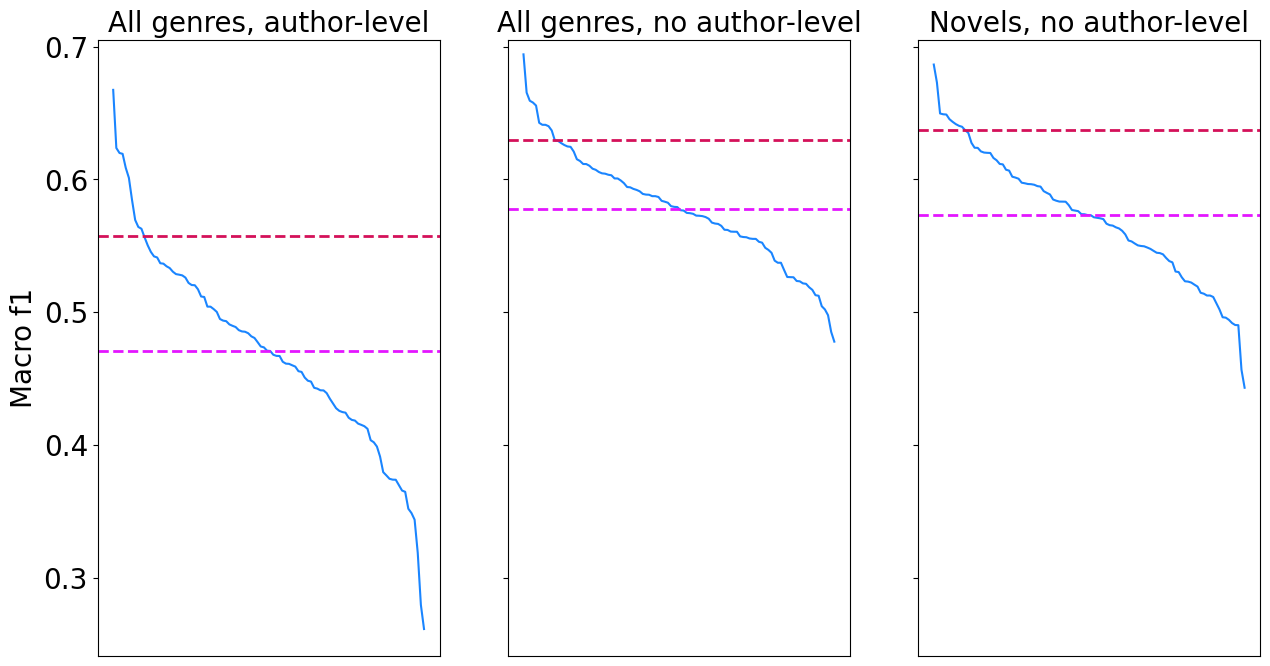

In [67]:
compareDataframesPlot([df_ovo_hpfv, df_ovo_hpfv_no_author, df_ovo_hpfv_novels], ['All genres, author-level', 'All genres, no author-level', 'Novels, no author-level'], sniplen=100)

In [68]:
good_test_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'test', True, 0.2)
bad_test_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'test', False, 0.2)
good_train_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'train', True, 0.2)
bad_train_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'train', False, 0.2)
good_eval_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'eval', True, 0.2)
bad_eval_books = filterGoodOrBadBooks(df_ovo_hpfv_no_author, 'eval', False, 0.2)

/tmp/ipykernel_48267/4034095856.py:28: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


In [69]:
bad_train_books

,statistic,pvalue
9789511461388_11_3,-0.238958,0.016650
9789511307310_15_3,-0.210419,0.035613
9789523563834_13_1,-0.211809,0.034385
9789523562806_13_1,-0.211809,0.034385
9789523561809_13_1,-0.211809,0.034385


In [70]:
#Function for calculating the correlation coefficients for if features being present at certain positions affects f1

def correlationF1Features(df, feat_column):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    columns = list(ind_feat_dict.keys())
    inds_f1 = df.sort_values('keylist_id')['f1'].to_numpy().tolist()
    pair_lists = [y for y in [y for y in df.sort_values('keylist_id')[feat_column].to_numpy()]]
    binary_matrix = np.zeros((100,338))
    for i in range(len(pair_lists)):
        named_list = [feat_ind_dict[x[1]] for x in pair_lists[i]]
        weights_list = [x[0] for x in pair_lists[i]]
        for j in range(len(columns)):
            feat = columns[j]
            binary_matrix[i][j] = weights_list[named_list.index(feat)]
            #ind = feat in named_list
            #if ind:
            #    binary_matrix[i][j] = 1
            #else:
            #    binary_matrix[i][j] = 0



    f1_bookid_df = pd.DataFrame(binary_matrix, index=inds_f1, columns=columns)

    def getBinaryCorrMatrix(df):
        Y = df.index.to_numpy()
        coeffs = []
        for c in df.columns:
            X = df[c].to_numpy()
            coeffs.append(stats.pearsonr(X, Y))
        return pd.DataFrame(coeffs, index=df.columns)

    returnable = getBinaryCorrMatrix(f1_bookid_df)
    return returnable
    #Only care about ones with p<0.05
    return returnable[(returnable['pvalue'] < 0.05) & (returnable['statistic'] > 0.2)].sort_values('statistic')

In [71]:
#For the 2nd paper, select only the features that are Medium+ in KFA

KFA_med = ['NestingOfClauses', 'SCONJ_To_ADV_Ratio', 'Derivation=Ton', 'PRON_Variation', 'PROPN_To_SCONJ_Ratio', 'ADJ_Variation_Corrected', 'Person[psor]=1', 'ccomp', 'TTR', 'ADV_To_SCONJ_Ratio', 'SCONJ_Variation_Corrected', 'Reflex=Yes', 'ADV_Variation', 'INTJ_To_SCONJ_Ratio', 'Number[psor]=Sing', 'VERB_Variation', 'StackingOfClauses', 'NOUN_Variation_Corrected', 'ADV_To_AUX_Ratio']


In [72]:
#All rows which are statistically significant (aka features which are statistically significant for at least one comparison :)
test_df = df_ovo_hpfv[df_ovo_hpfv['sniplen']==100]
test_results_0_1 = correlationF1Features(test_df, '13+ vs. 7-8')
test_results_0_1 = test_results_0_1.apply(lambda x: x['statistic'] if (x['pvalue']<0.05 and abs(x['statistic']) > 0.2) else np.nan, axis=1)
test_results_0_2 = correlationF1Features(test_df, '13+ vs. 9-12')
test_results_0_2 = test_results_0_2.apply(lambda x: x['statistic'] if (x['pvalue']<0.05 and abs(x['statistic']) > 0.2) else np.nan, axis=1)
test_results_1_2 = correlationF1Features(test_df, '7-8 vs. 9-12')
test_results_1_2 = test_results_1_2.apply(lambda x: x['statistic'] if (x['pvalue']<0.05 and abs(x['statistic']) > 0.2) else np.nan, axis=1)
corrs_df = pd.DataFrame({'7-8 vs. 9-12':test_results_1_2, '13+ vs. 7-8':test_results_0_1,  '13+ vs. 9-12':test_results_0_2}, index=test_results_1_2.index)
corrs_df = corrs_df.dropna(how='all')
corrs_df.loc["StackingOfClauses"]


/tmp/ipykernel_48267/2503760973.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


7-8 vs. 9-12   -0.234916
13+ vs. 7-8     0.302483
13+ vs. 9-12         NaN
Name: StackingOfClauses, dtype: float64

In [73]:
print(len(test_results_0_1.dropna()))
print(len(test_results_0_2.dropna()))
print(len(test_results_1_2.dropna()))

52
19
111


/tmp/ipykernel_48267/2503760973.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


<Axes: >

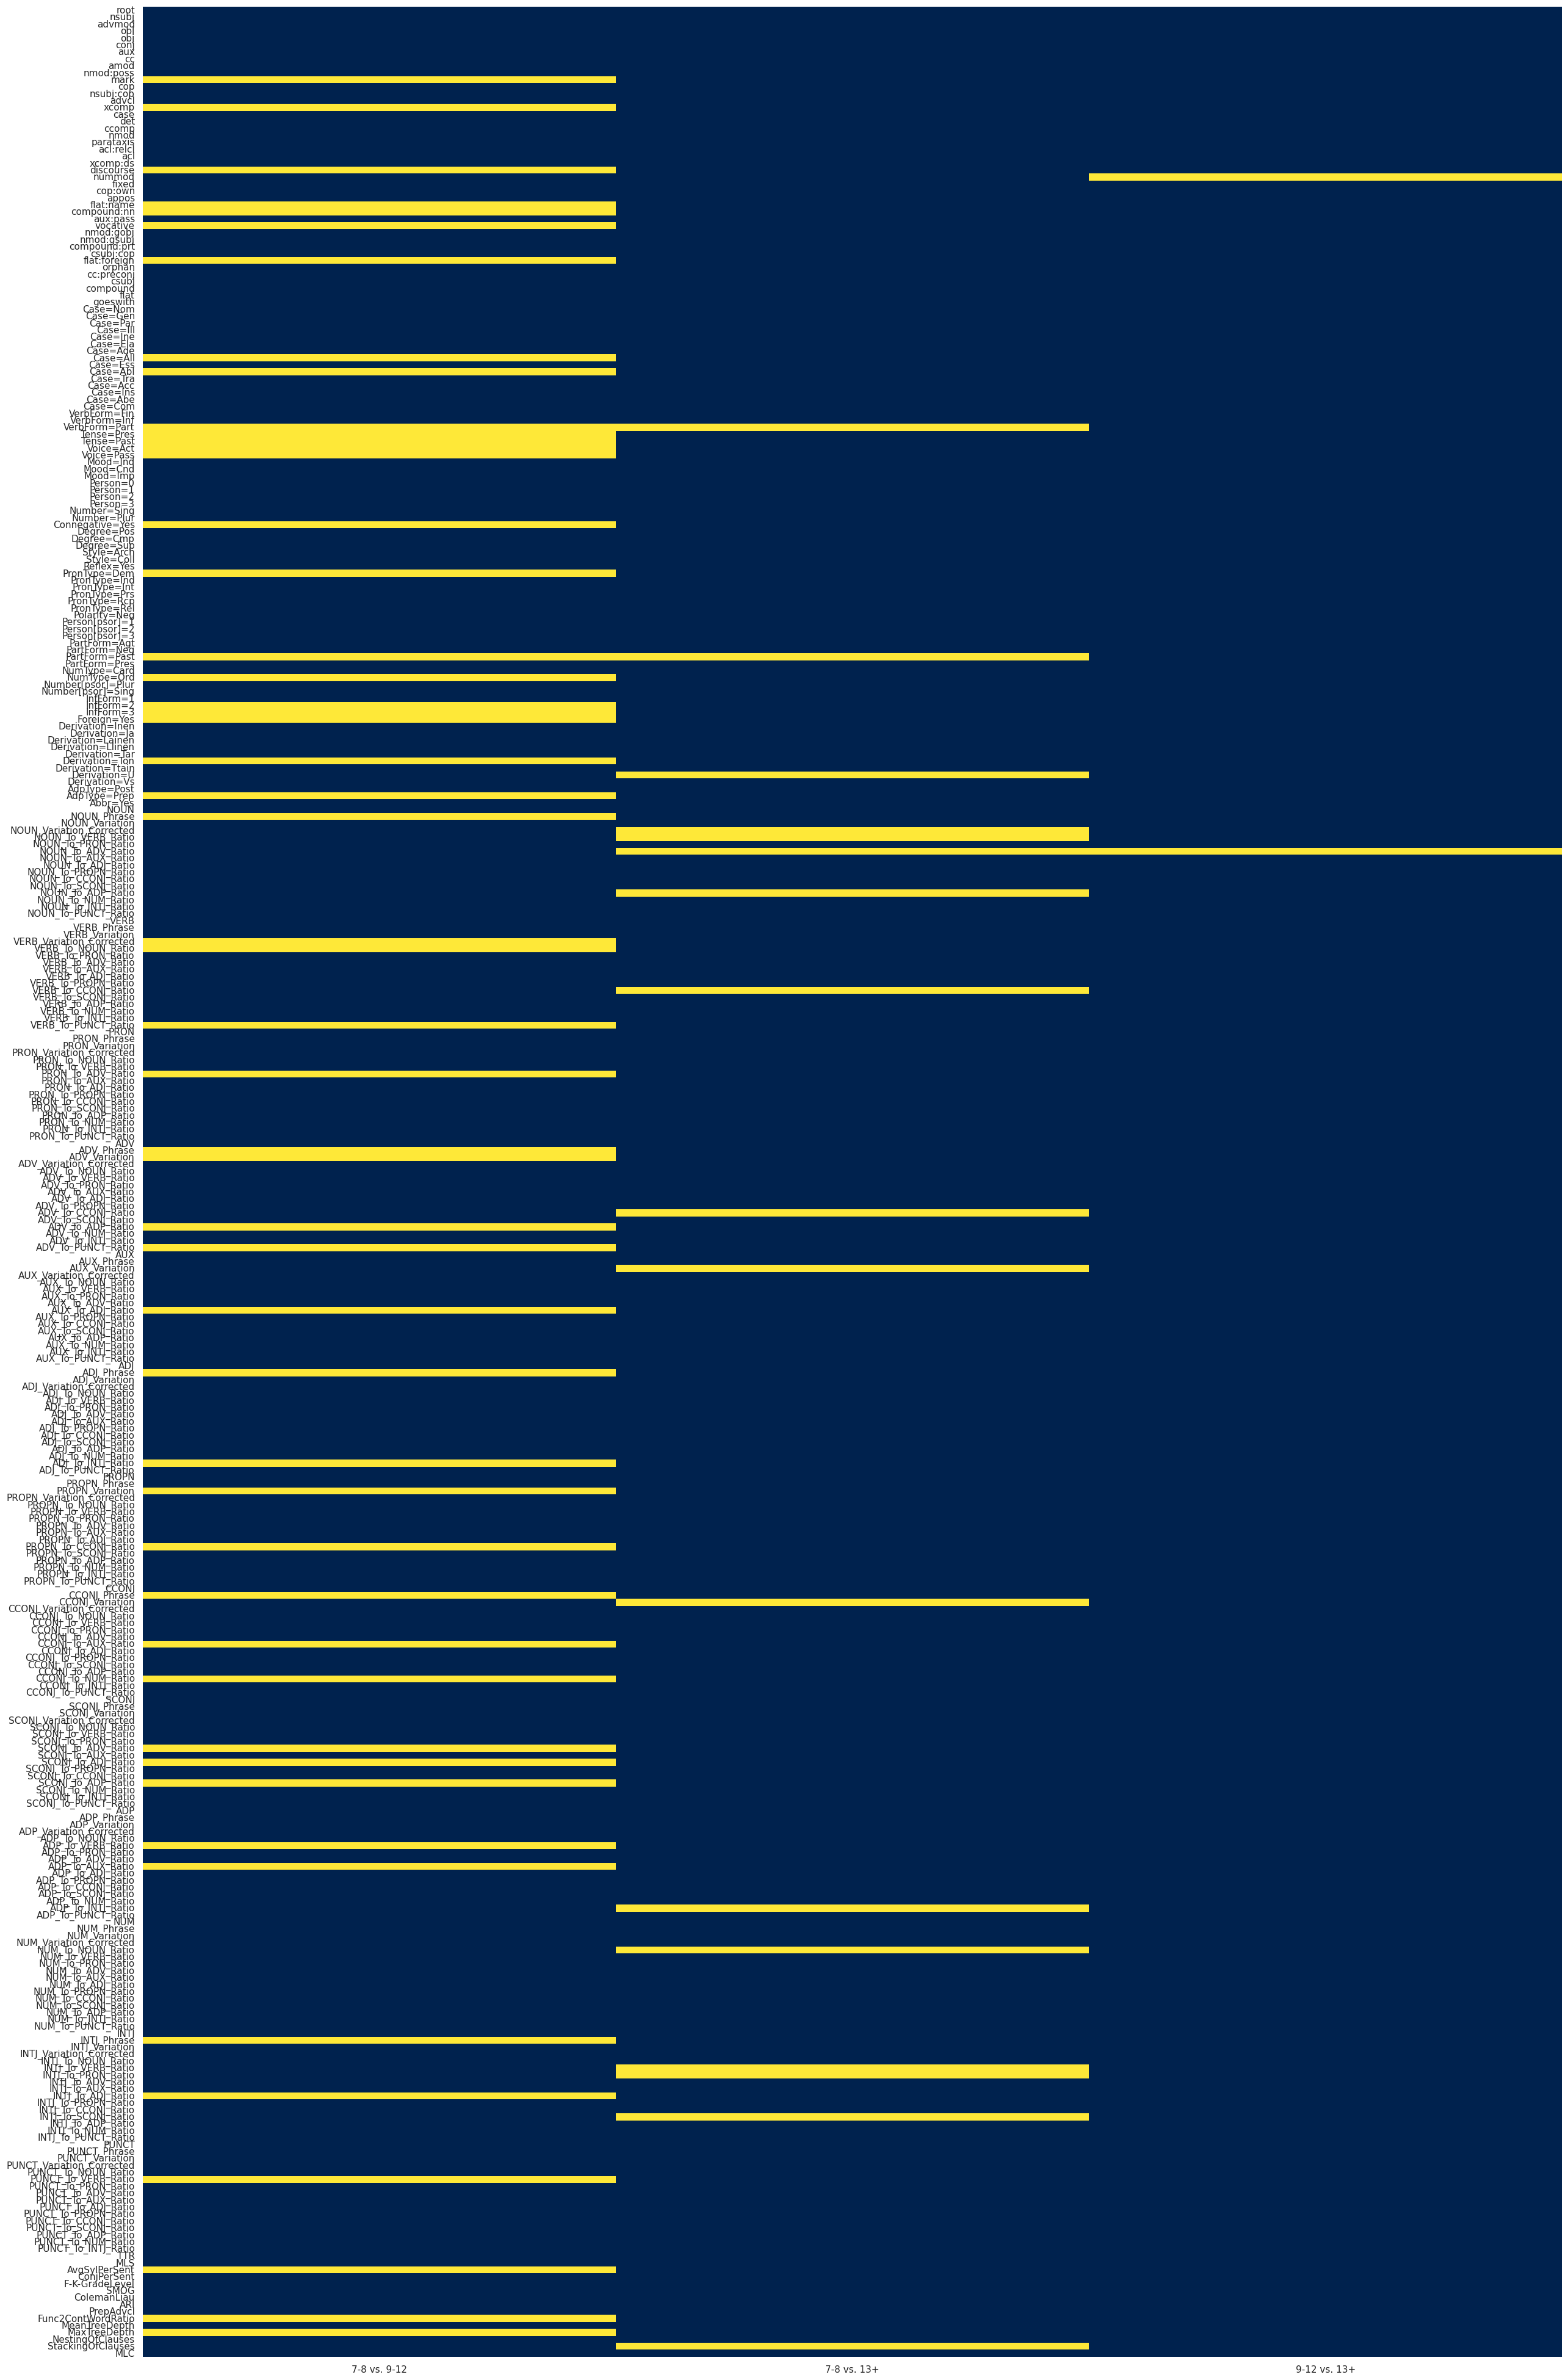

In [74]:
test_df = df_ovo_hpfv[df_ovo_hpfv['sniplen']==100]
#test_df = df_ovo_hpfv_no_author[df_ovo_hpfv_no_author['sniplen']==100]
#No author-splitting
#test_df = df_ovo_hpfv_no_author[df_ovo_hpfv_no_author['sniplen']==100]
#No author splitting and only novels
test_results_0_1 = correlationF1Features(test_df, '13+ vs. 7-8')
#test_results_0_1 = test_results_0_1[test_results_0_1.index.isin(KFA_med)]
test_results_0_1_masked = test_results_0_1.apply(lambda x: True if (x['pvalue']<0.01) else False, axis=1)
test_results_0_1 = test_results_0_1['statistic']
test_results_0_2 = correlationF1Features(test_df, '13+ vs. 9-12')
#test_results_0_2 = test_results_0_2[test_results_0_2.index.isin(KFA_med)]
test_results_0_2_masked = test_results_0_2.apply(lambda x: True if (x['pvalue']<0.01) else False, axis=1)
test_results_0_2 = test_results_0_2['statistic']
test_results_1_2 = correlationF1Features(test_df, '7-8 vs. 9-12')
#test_results_1_2 = test_results_1_2[test_results_1_2.index.isin(KFA_med)]
test_results_1_2_masked = test_results_1_2.apply(lambda x: True if (x['pvalue']<0.01) else False, axis=1)
test_results_1_2 = test_results_1_2['statistic']

corrs_df = pd.DataFrame({'7-8 vs. 9-12':test_results_1_2_masked.to_numpy().tolist(), '7-8 vs. 13+':test_results_0_1_masked.to_numpy().tolist(),  '9-12 vs. 13+':test_results_0_2_masked.to_numpy().tolist()}, index=test_results_1_2.index)


plt.figure(figsize=(30,50))
sns.set_theme(font_scale=1)
sns.heatmap(corrs_df, cmap='cividis', yticklabels=corrs_df.index.to_numpy().tolist(), fmt = '', vmin=0, vmax=1, cbar=False)


In [75]:
def findFeatPlacements(pair_lists, feat, reversal=False, sign=True):
    #Function for getting all the placements of a particular feature
    returnable = []
    for i in range(len(pair_lists)):
        named_list = [feat_ind_dict[x[1]] for x in pair_lists[i]]
        weights_list = [x[0] for x in pair_lists[i]]
        if sign:
            if reversal:
                returnable.append(weights_list[named_list.index(feat)]*-1)
            else:
                returnable.append(weights_list[named_list.index(feat)])
        else:
            returnable.append(np.nan)
    return returnable

def plotFeaturePlacementAndF1(df, feat):
    ind_feat_dict = {x[1]:x[0] for x in feat_ind_dict.items()}
    inds_f1 = df.sort_values('f1', ascending=False)['f1'].to_numpy().tolist()
    pair_lists_0_1 = []
    pair_lists_0_2 = []
    pair_lists_1_2 = []
    inds_f1 = []
    df=df.sort_values('f1')
    for i in range(100):
        inds_f1.append(df.iloc[i]['f1'])
        pair_lists_0_1.append(df.iloc[i]['13+ vs. 7-8'])
        pair_lists_0_2.append(df.iloc[i]['13+ vs. 9-12'])
        pair_lists_1_2.append(df.iloc[i]['7-8 vs. 9-12'])

    #pair_lists_0_1 = [y for y in [y for y in df.sort_values('f1', ascending=False)['13+ vs. 7-8'].to_numpy()]]
    #pair_lists_0_2 = [y for y in [y for y in df.sort_values('f1', ascending=False)['13+ vs. 9-12'].to_numpy()]]
    #pair_lists_1_2 = [y for y in [y for y in df.sort_values('f1', ascending=False)['7-8 vs. 9-12'].to_numpy()]]
    f1_bookid_df = pd.DataFrame({'13+ vs. 7-8':findFeatPlacements(pair_lists_0_1, feat, sign=test_results_0_1_masked.loc[feat]), '13+ vs. 9-12':findFeatPlacements(pair_lists_0_2, feat, sign=test_results_0_2_masked.loc[feat]), '7-8 vs. 9-12':findFeatPlacements(pair_lists_1_2, feat, sign=test_results_1_2_masked.loc[feat])}, index=inds_f1)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    for c in f1_bookid_df.columns:
        x = f1_bookid_df[c].to_numpy()
        if np.isnan(x).all():
            continue
        y= f1_bookid_df.index.to_numpy()
        plt.scatter(x=x, y=y, label=c, alpha=0.3)
        # fitting a linear regression line
        m, b = np.polyfit(x, y, 1)
        # adding the regression line to the scatter plot
        plt.plot(x, m*x + b)


    ax.legend()
    ax.set_ylim(0.25,0.7)

    plt.show()



In [76]:
pprint(feat_ind_dict)

{0: 'root',
 1: 'nsubj',
 2: 'advmod',
 3: 'obl',
 4: 'obj',
 5: 'conj',
 6: 'aux',
 7: 'cc',
 8: 'amod',
 9: 'nmod:poss',
 10: 'mark',
 11: 'cop',
 12: 'nsubj:cop',
 13: 'advcl',
 14: 'xcomp',
 15: 'case',
 16: 'det',
 17: 'ccomp',
 18: 'nmod',
 19: 'parataxis',
 20: 'acl:relcl',
 21: 'acl',
 22: 'xcomp:ds',
 23: 'discourse',
 24: 'nummod',
 25: 'fixed',
 26: 'cop:own',
 27: 'appos',
 28: 'flat:name',
 29: 'compound:nn',
 30: 'aux:pass',
 31: 'vocative',
 32: 'nmod:gobj',
 33: 'nmod:gsubj',
 34: 'compound:prt',
 35: 'csubj:cop',
 36: 'flat:foreign',
 37: 'orphan',
 38: 'cc:preconj',
 39: 'csubj',
 40: 'compound',
 41: 'flat',
 42: 'goeswith',
 43: 'Case=Nom',
 44: 'Case=Gen',
 45: 'Case=Par',
 46: 'Case=Ill',
 47: 'Case=Ine',
 48: 'Case=Ela',
 49: 'Case=Ade',
 50: 'Case=All',
 51: 'Case=Ess',
 52: 'Case=Abl',
 53: 'Case=Tra',
 54: 'Case=Acc',
 55: 'Case=Ins',
 56: 'Case=Abe',
 57: 'Case=Com',
 58: 'VerbForm=Fin',
 59: 'VerbForm=Inf',
 60: 'VerbForm=Part',
 61: 'Tense=Pres',
 62: 'Tens

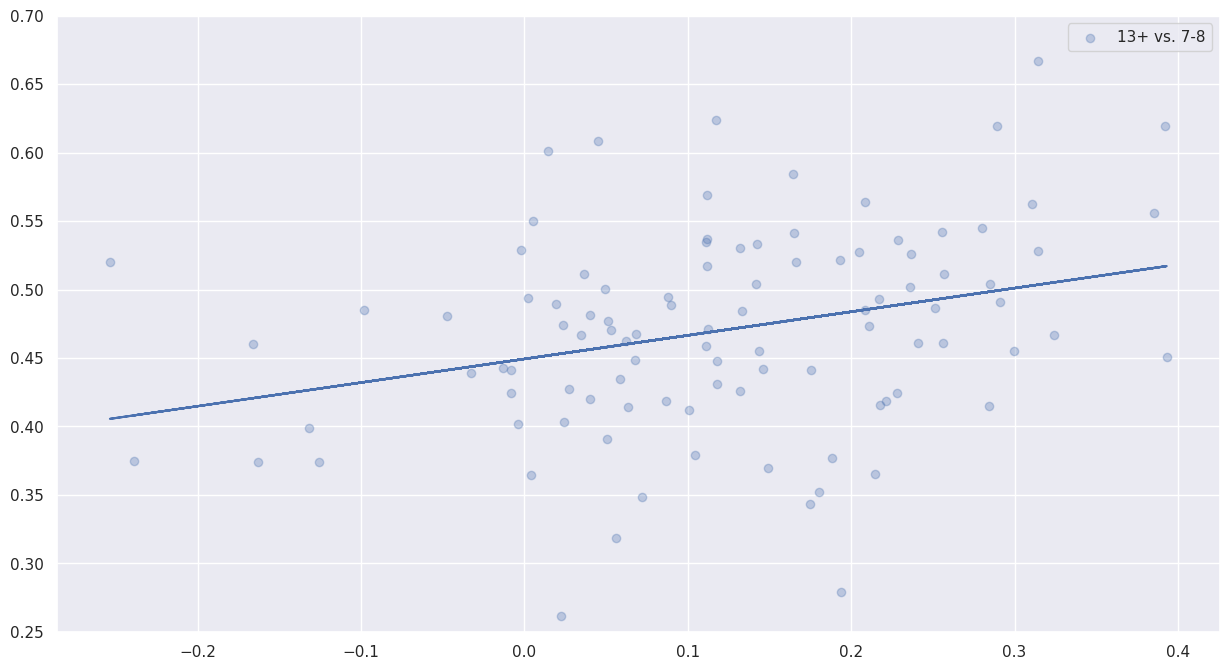

In [77]:
#print(test_df.sort_values('f1', ascending=False)['13+ vs. 7-8'].to_numpy())
test_df = df_ovo_hpfv[df_ovo_hpfv['sniplen'] == 100]
plotFeaturePlacementAndF1(test_df, 'StackingOfClauses')

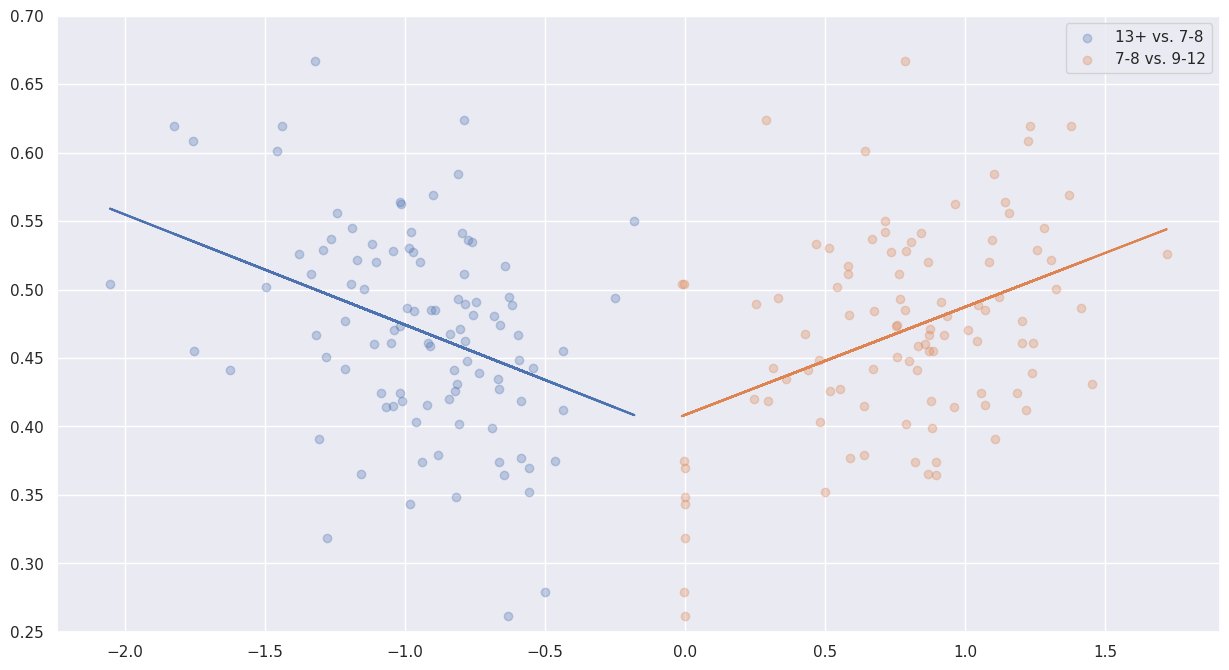

In [78]:
plotFeaturePlacementAndF1(test_df, 'PartForm=Past')

In [82]:
test_df = df_ovo_hpfv_no_author[df_ovo_hpfv_no_author['sniplen']==100]

test_results = correlationF1Features(test_df, '13+ vs. 9-12')
test_results[test_results['statistic'] > 0.2]

/tmp/ipykernel_48267/2503760973.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


,statistic,pvalue
advcl,0.217991,0.029348
Case=Par,0.262741,0.008268
Number=Plur,0.214908,0.031776
PartForm=Pres,0.234442,0.018886
InfForm=1,0.204580,0.041178
Derivation=Ja,0.230971,0.020776
VERB_Phrase,0.221315,0.026908
PRON_To_VERB_Ratio,0.259065,0.009250
PRON_To_AUX_Ratio,0.211122,0.034987
PROPN_To_PRON_Ratio,0.236144,0.018015


In [83]:
test_df = df_ovo_hpfv_novels[df_ovo_hpfv_novels['sniplen']==100]

test_results = correlationF1Features(test_df, '13+ vs. 9-12')
test_results[test_results['statistic'] > 0.3]

/tmp/ipykernel_48267/2503760973.py:30: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  coeffs.append(stats.pearsonr(X, Y))


,statistic,pvalue
